## Problem Statement




"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."
The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models. Two datasets are made available here: The churn-80 and churn-20 datasets can be downloaded.
The two sets are from the same batch, but have been split by an 80/20 ratio. As more data is often desirable for developing ML models, let's use the larger set (that is, churn-80) for training and cross-validation purposes, and the smaller set (that is, churn-20) for final testing and model performance evaluation.

## Data Description

Telecom Churn Datasets

Each row represents a customer; each column contains customer’s attributes.
The datasets have the following attributes or features:

- State: string
- Account length: integer
- Area code: integer
- International plan: string
- Voice mail plan: string
- Number vmail messages: integer
- Total day minutes: double
- Total day calls: integer
- Total day charge: double
- Total eve minutes: double
- Total eve calls: integer
- Total eve charge: double
- Total night minutes: double
- Total night calls: integer
- Total night charge: double
- Total intl minutes: double
- Total intl calls: integer
- Total intl charge: double
- Customer service calls: integer
- Churn: string

The "churn-bigml-80" dataset contains 2666 rows (customers) and 20 columns (features).

The "Churn" column is the target to predict.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import random

import plotly.express as px

import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})

In [3]:
data = pd.read_csv("/content/drive/MyDrive/code_files/teleco_churn/churn-bigml-80.csv")
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [4]:
# Load the data
df = data.copy()

## Different Visualizations

### Line Plots

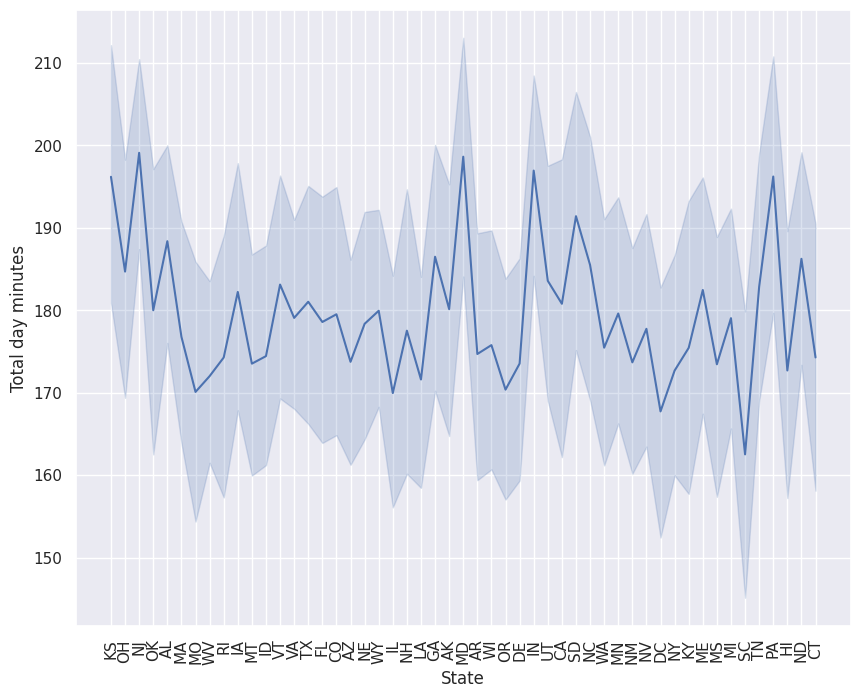

In [ ]:
# Line plot
x = sns.lineplot(data=df, x="State", y="Total day minutes")
x.tick_params(axis='x', rotation=90)

- A line plot, also known as a line chart, is a type of graph that displays data points as a series of connected points or markers along a horizontal or vertical axis. Line plots are commonly used to display trends or patterns in data over time, and can be useful for identifying relationships between variables, detecting outliers or anomalies, and making predictions.
-  The above code plots the lineplot with the "State" variable on the x-axis and the "Total day minutes" variable on the y-axis. This means that for each state, the plot will show the total number of minutes spent on phone calls during the day.
- It seems there are spikes in call minutes in NJ, MD, IN, PA states.

### Scatter Plot

<Axes: xlabel='Total day minutes', ylabel='Total night minutes'>

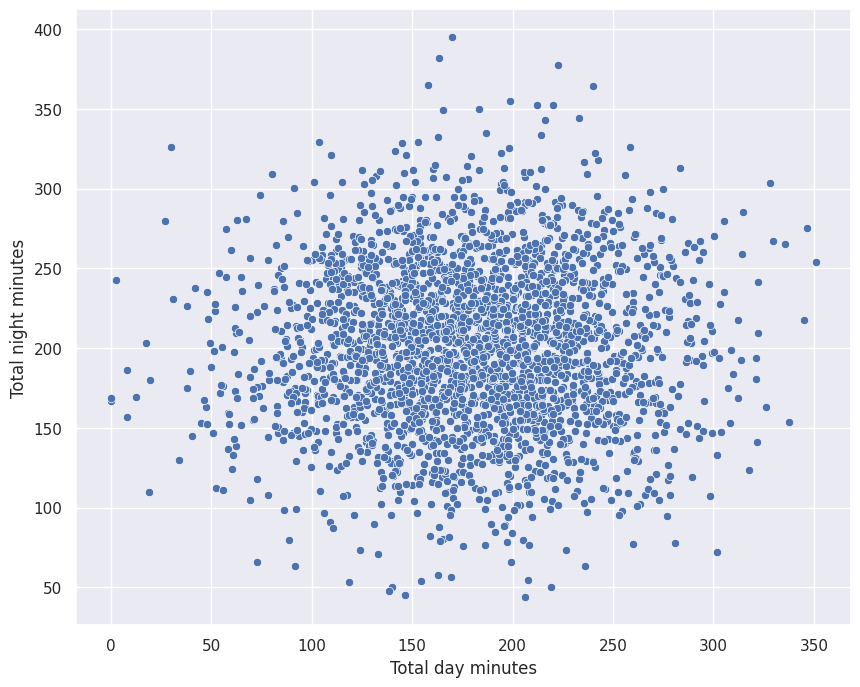

In [ ]:
# Scatter plot
sns.scatterplot(data=df, x="Total day minutes", y="Total night minutes")

- a scatter plot is a type of data visualization that is used to display the relationship between two variables. It is especially useful for identifying patterns, trends, and correlations between the variables.
- In the above code,  the scatter plot is plotting the relationship between the "Total day minutes" column and the "Total night minutes" column. The resulting scatter plot will show how the total minutes used during the day and at night are related for each observation in the dataset.
- It seems there is no correct relation between both the features

### Bar Plot

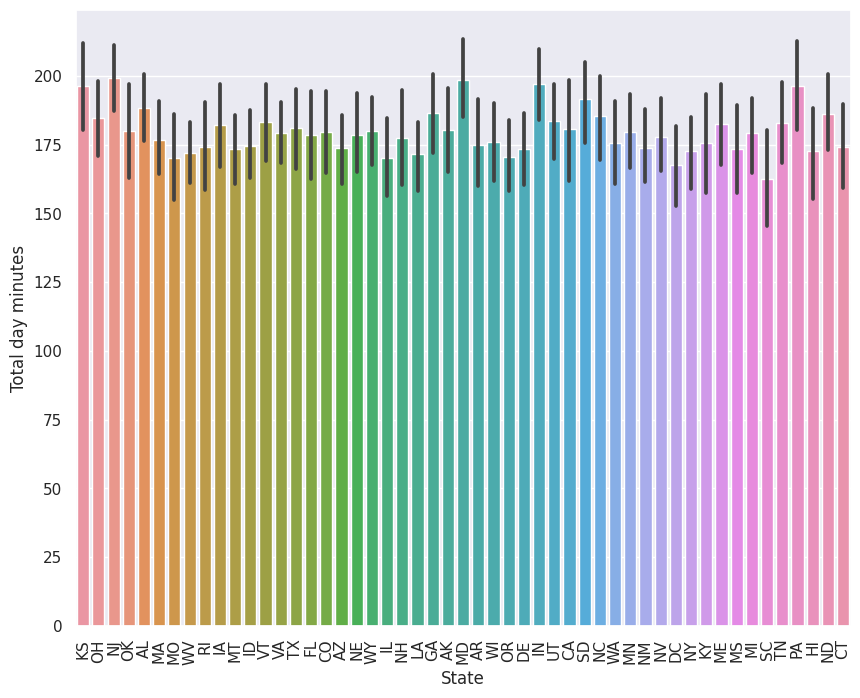

In [ ]:
# Bar plot
x = sns.barplot(data=df, x="State", y="Total day minutes")
x.tick_params(axis='x', rotation=90)

- A bar plot is a graphical representation of the data in which the values of different categories are represented as rectangular bars with lengths proportional to the values they represent. Bar plots are commonly used to visualize and compare different categories of data, such as sales by region, population by country, or scores by subject.
- In the above plot, we have the States on the x-axis and the Total day minutes on the y-axis.
- We can observe that the highest day minutes is in KS, NJ, MD and PA states.

### Histogram

<Axes: xlabel='Total day minutes', ylabel='Count'>

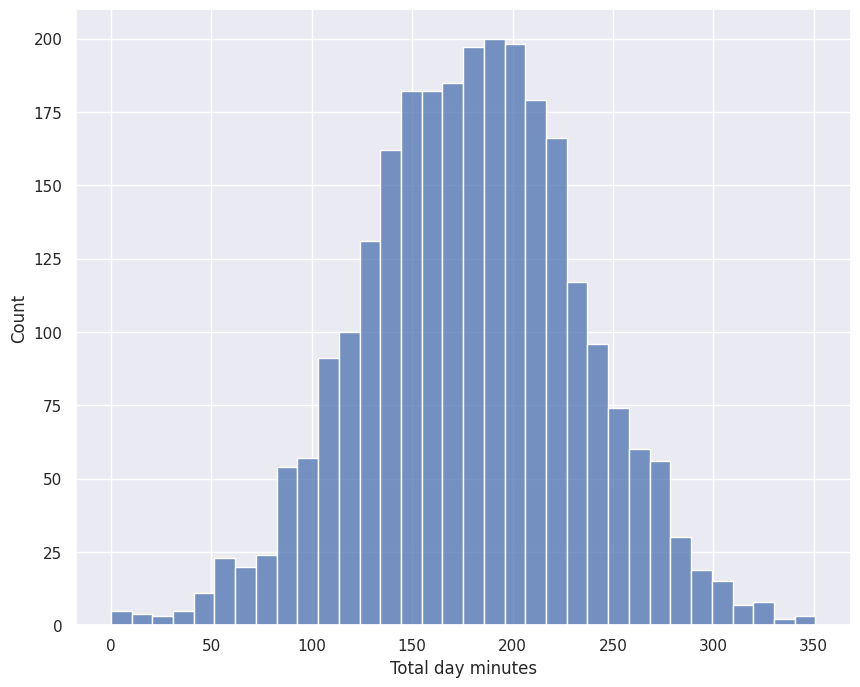

In [ ]:
# Histogram
sns.histplot(data=df, x="Total day minutes")

<Axes: xlabel='Total day calls', ylabel='Count'>

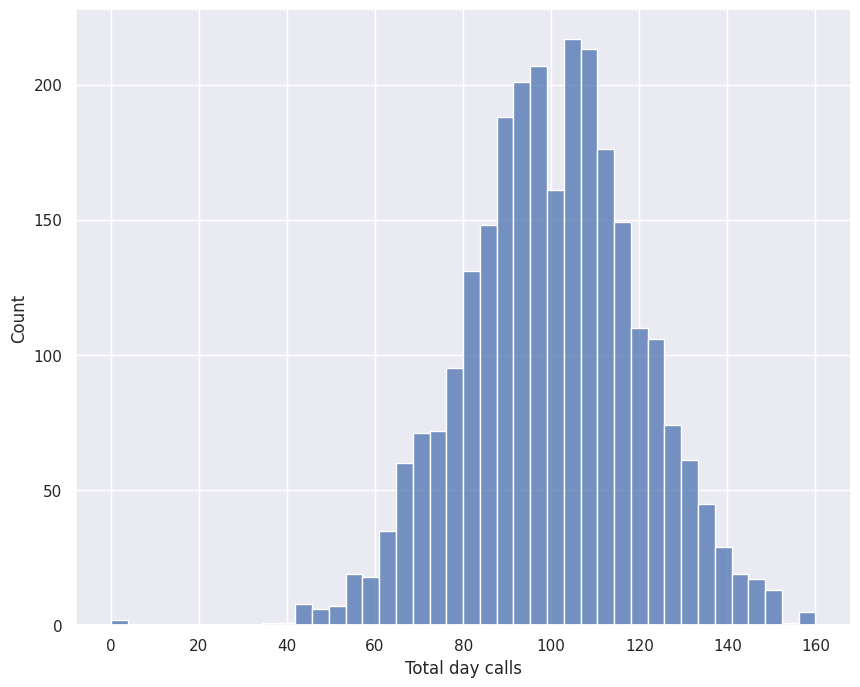

In [ ]:
# Histogram
sns.histplot(data=df, x="Total day calls")

<Axes: xlabel='Total day charge', ylabel='Count'>

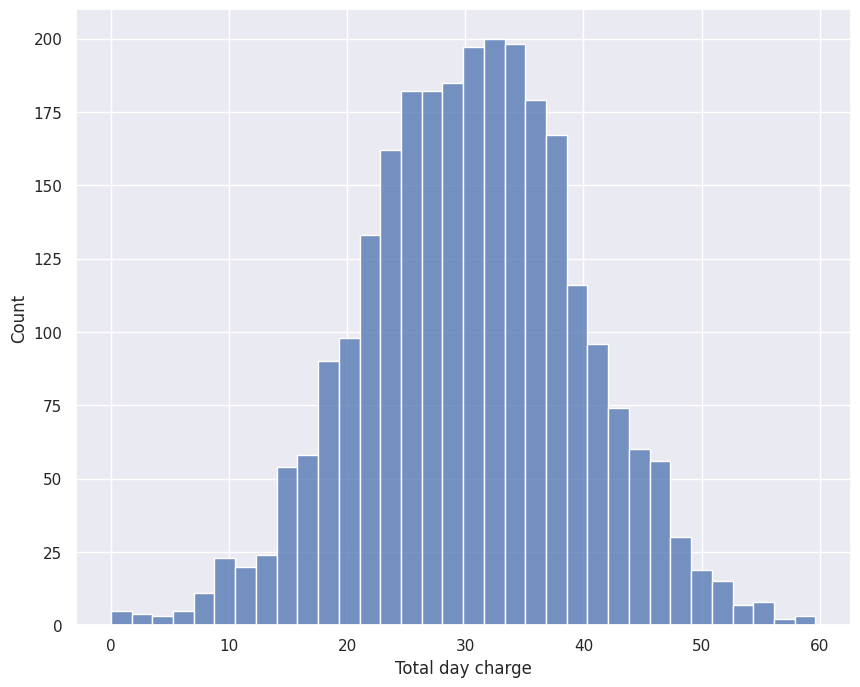

In [ ]:
# Histogram
sns.histplot(data=df, x="Total day charge")

<Axes: xlabel='Total night minutes', ylabel='Count'>

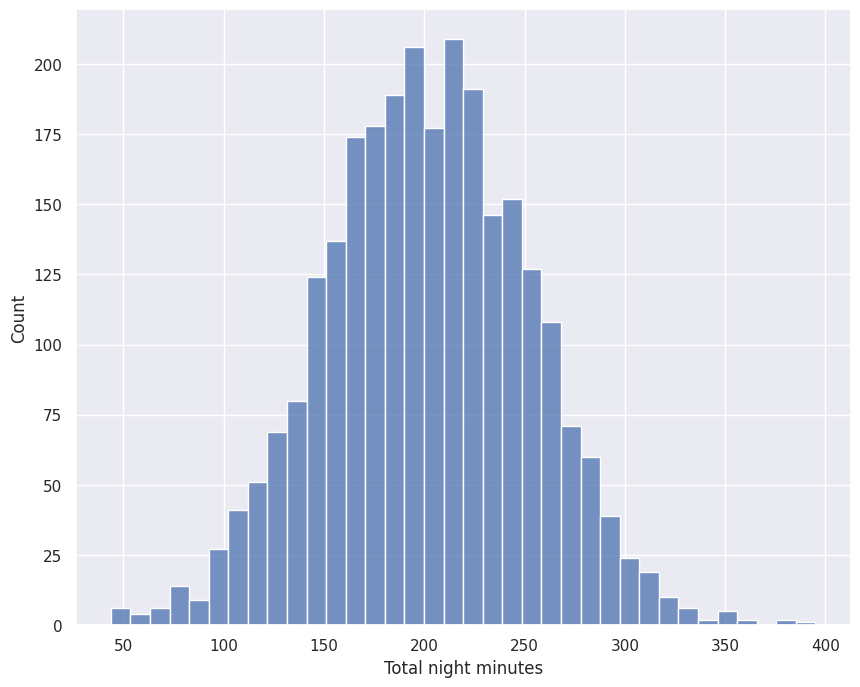

In [ ]:
# Histogram
sns.histplot(data=df, x="Total night minutes")

-  A histogram is a graphical representation of the distribution of a numerical variable, where the data is split into intervals (or "bins") and the frequency or proportion of observations falling into each bin is represented by the height of the bar.
- In all the above histograms plotted, we can find that the columns have a gaussian distribution so a transformation on the data may not be required for these features.

### Density Plot

<Axes: xlabel='Total day minutes', ylabel='Density'>

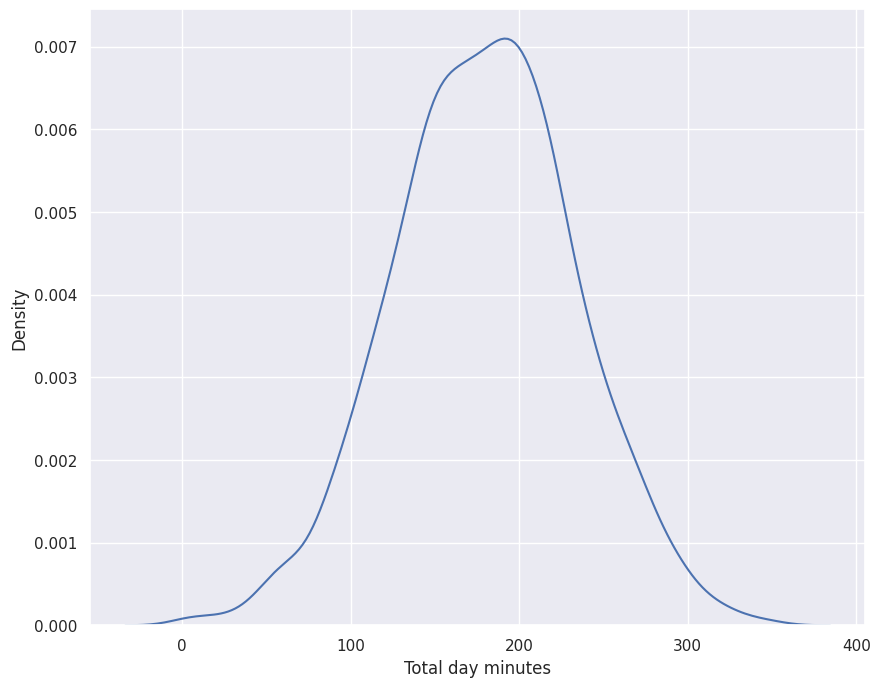

In [ ]:
# Density plot
sns.kdeplot(data=df, x="Total day minutes")

<Axes: xlabel='Total night minutes', ylabel='Density'>

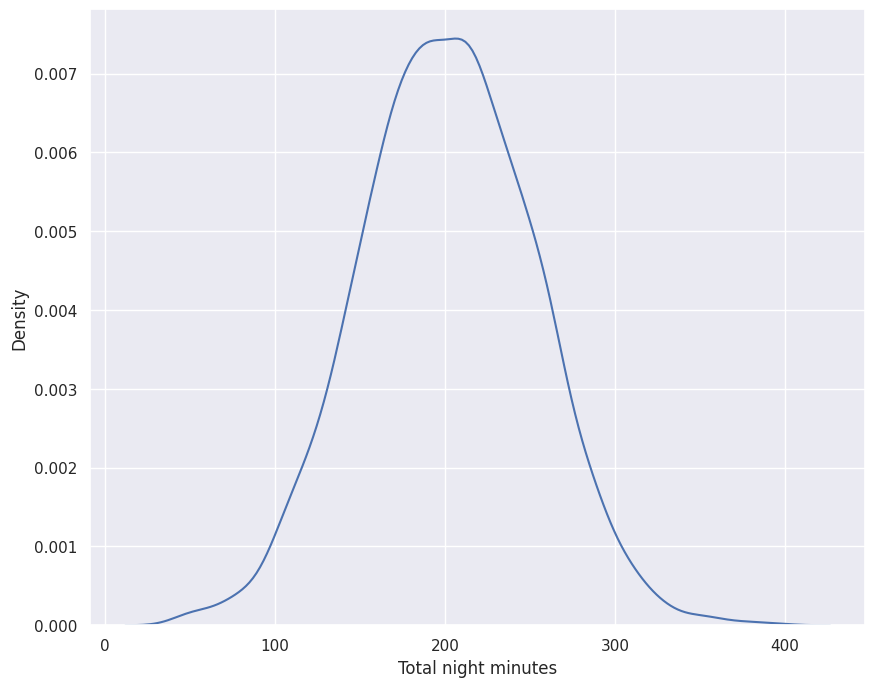

In [ ]:
# Density plot
sns.kdeplot(data=df, x="Total night minutes")

<Axes: xlabel='Total night charge', ylabel='Density'>

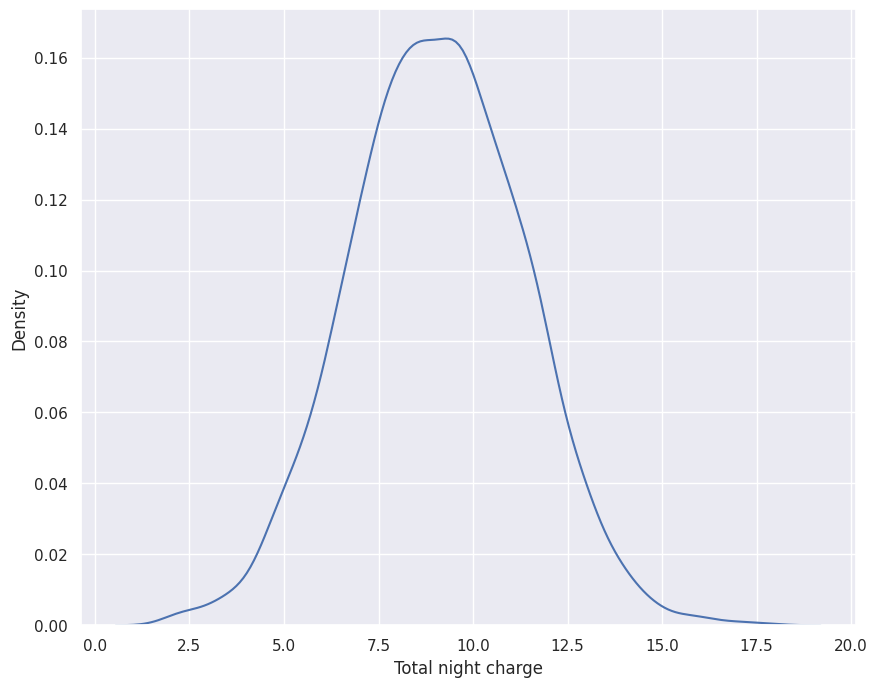

In [ ]:
# Density plot
sns.kdeplot(data=df, x="Total night charge")

- KDE plot (Kernel Density Estimate plot) is a non-parametric way to estimate the probability density function of a continuous variable. It is a smoothed version of the histogram, and it is used to visualize the distribution of a variable. The KDE plot shows the shape of the distribution, and it is useful for identifying patterns and trends in the data.
- This plot even shows the clear distribution of the 3 features as shown above as this is smoothed form of histogram, this even has the same gaussian distribution as observed from histograms

### Box Plot

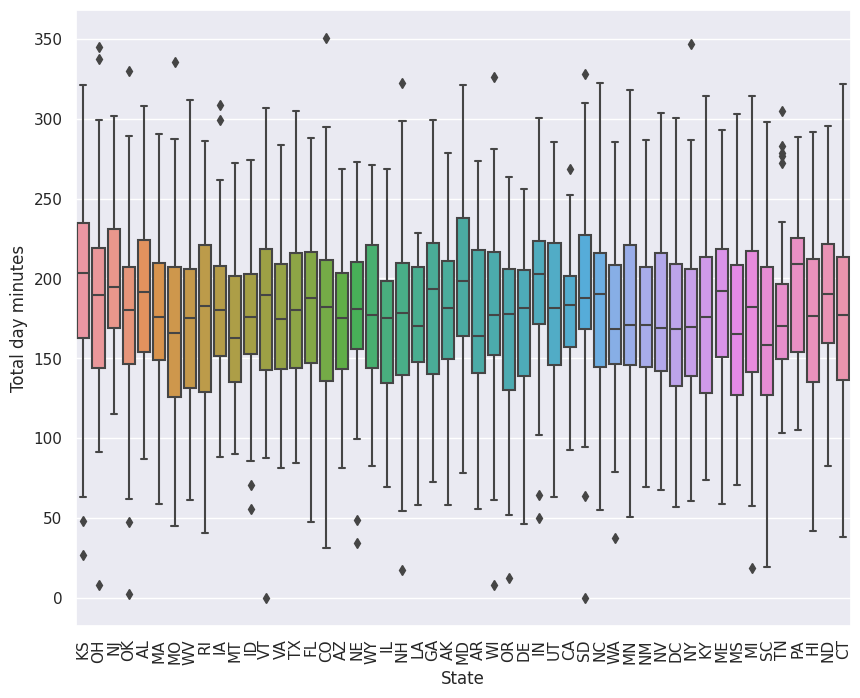

In [ ]:
# Box plot
x= sns.boxplot(data=df, x="State", y="Total day minutes")
x.tick_params(axis='x', rotation=90)

- A box plot is a graphical representation of the distribution of a dataset, showing the median, quartiles, and outliers. It is useful for identifying any unusual observations or skewness in the data.
- The above plot shows the distribution of "Total day minutes" across each "State" category, with a box representing the interquartile range (IQR), whiskers representing the range of the data, and any points outside the whiskers indicating outliers.
- We can observe that there are some outliers in the feature so this needs to be hanndled using outlier treatment and it can be simialrly observed for other features in the data.

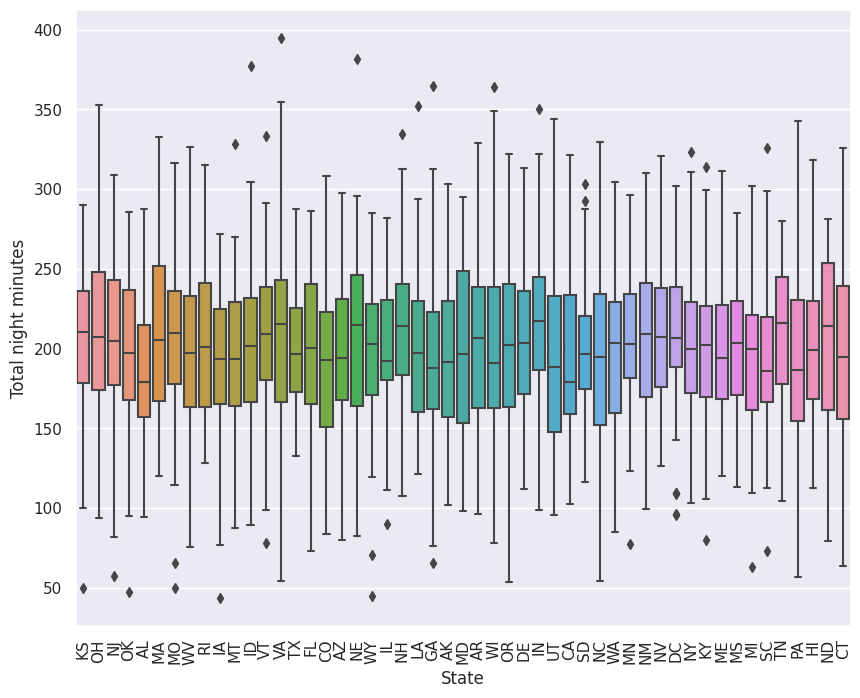

In [ ]:
# Box plot
x= sns.boxplot(data=df, x="State", y="Total night minutes")
x.tick_params(axis='x', rotation=90)

### Violin Plot

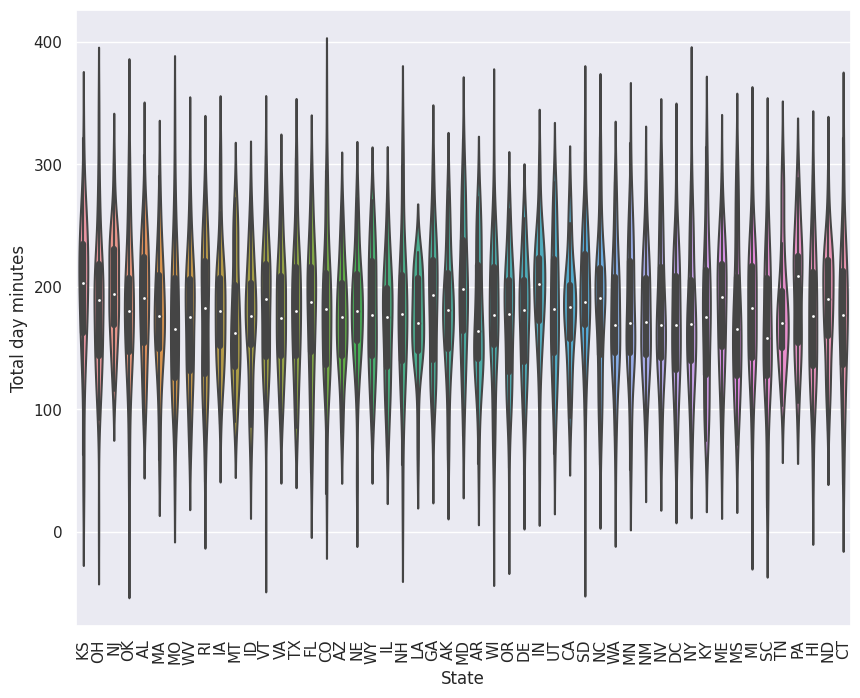

In [ ]:
# Violin plot
x=sns.violinplot(data=df, x="State", y="Total day minutes")
x.tick_params(axis='x', rotation=90)

- A violin plot is a type of data visualization that combines the features of a box plot and a kernel density plot. It is used to visualize the distribution of data and to compare the distribution of multiple categories.
- The above plot shows the distribution of "Total day minutes" for each state. Here we can observe both the density and distribution across each state. Similarly other charges, calls, day and night features can eb plotted.

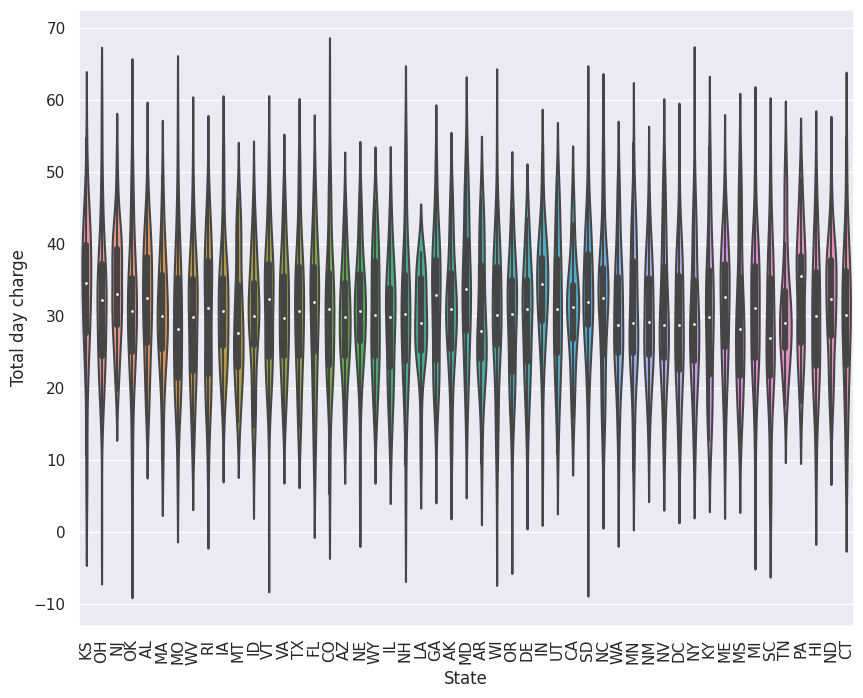

In [ ]:
# Violin plot
x=sns.violinplot(data=df, x="State", y="Total day charge")
x.tick_params(axis='x', rotation=90)

### Heatmap

<Axes: >

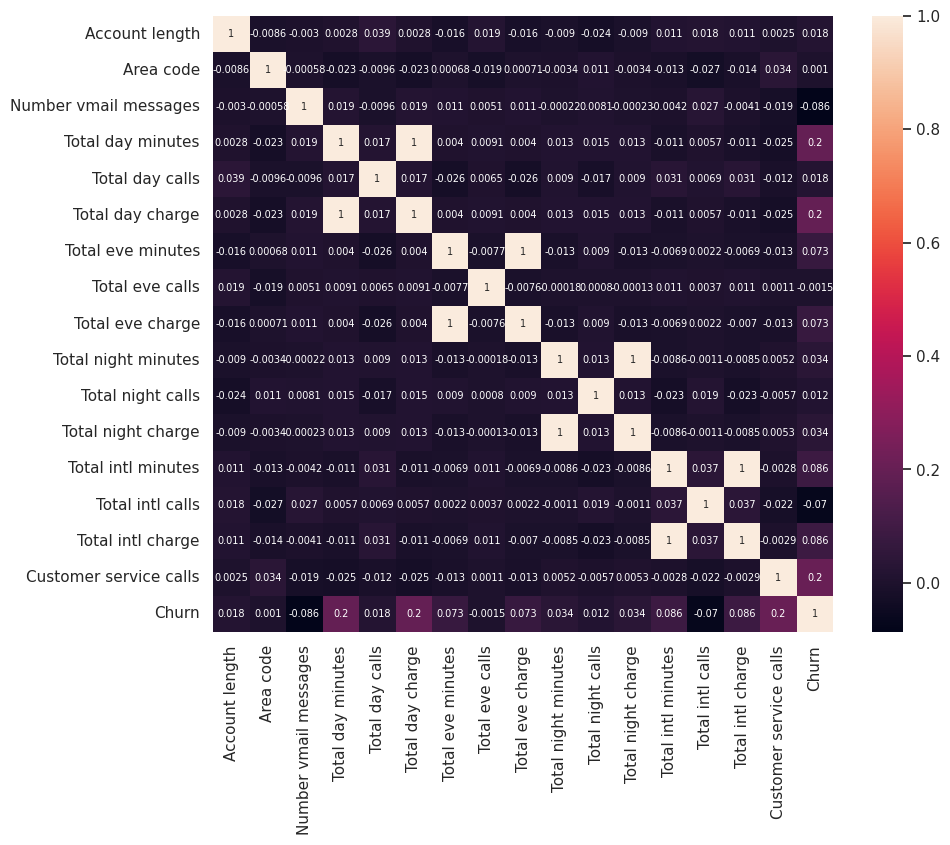

In [ ]:
# Heatmap
sns.heatmap(data=df.corr(),annot=True,annot_kws={'size': 7})


- A heatmap is a graphical representation of data where the values are represented by colors. It is useful to analyze the correlation between different variables in a dataset.
- From the above heatmap, we can observe that the variables Total day minutes, Total day charge, and Number vmail messages have a weak positive correlation with the Churn variable. On the other hand, the variable Total eve minutes has a weak negative correlation with Churn.

- The correlation between the variables can also be seen from the correlation matrix, where darker shades indicate stronger correlation (positive or negative). For instance, Total day minutes and Total day charge have a perfect positive correlation with each other, which makes sense as they are both calculated based on the same variable "Total day minutes." Similarly, Total night minutes and Total night charge have a perfect positive correlation.



### Pairplot

In [ ]:
# pairplot
sns.pairplot(data=df)

Output hidden; open in https://colab.research.google.com to view.

- Pairplot is a graphical representation of pairwise relationships in a dataset. It displays scatterplots for all pairs of variables in a dataset and histograms for the diagonal plots. It is a useful tool for exploring and visualizing the correlations between variables.
- From the above pairplot, we cann observe that there are some features which have good positive relation with other features and most of the features even seem to be independent.

### Contour Plot

<Axes: xlabel='Total day minutes', ylabel='Total eve minutes'>

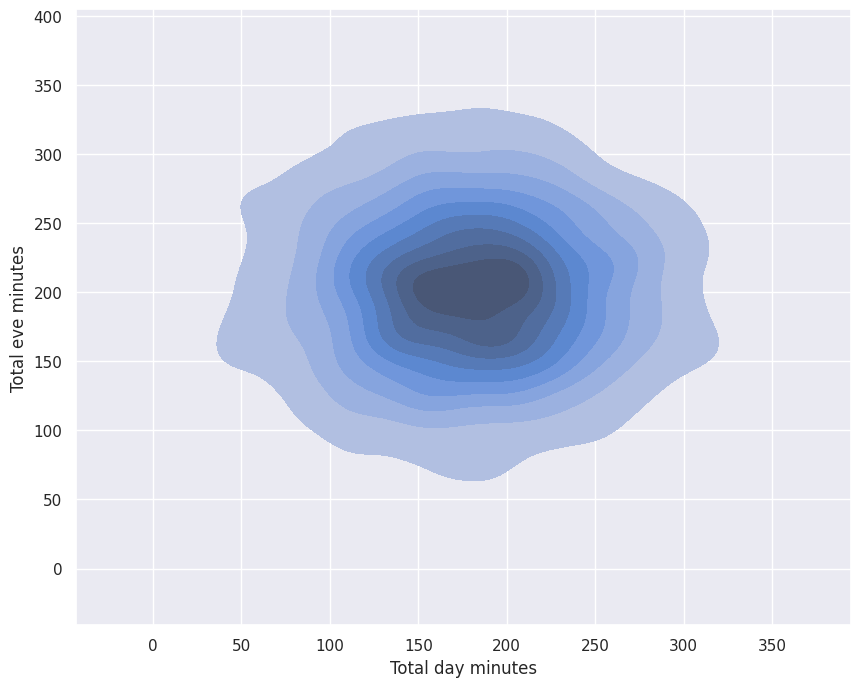

In [ ]:
# Contour plot
sns.kdeplot(data=df, x="Total day minutes", y="Total eve minutes", fill=True)

<Axes: xlabel='Total night minutes', ylabel='Total eve minutes'>

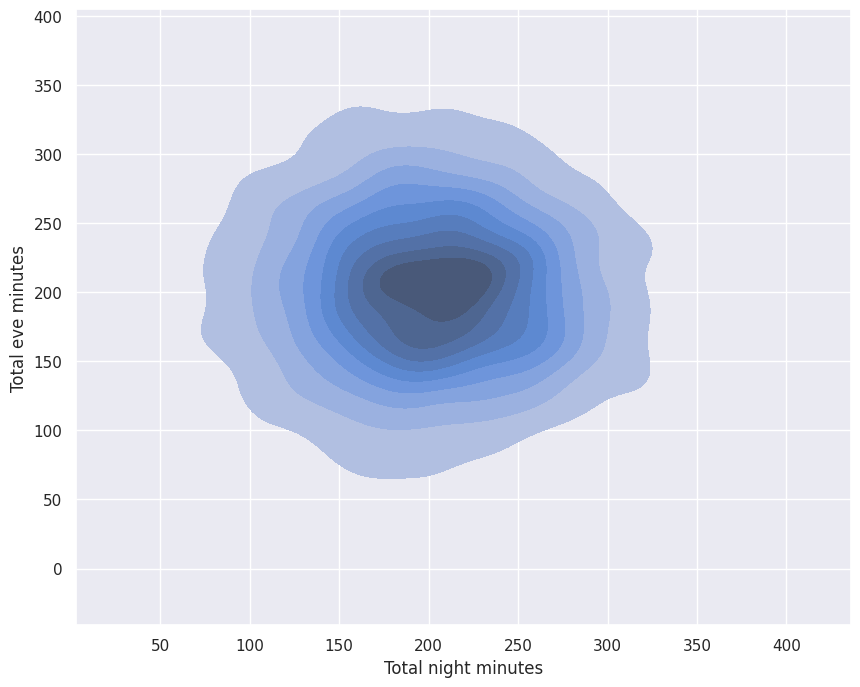

In [ ]:
# Contour plot
sns.kdeplot(data=df, x="Total night minutes", y="Total eve minutes", fill=True)

- A contour plot is a type of 2D plot that represents three-dimensional data. It is created by plotting contours, which are lines that connect points of equal value, and can be used to visualize the relationship between two variables.

- The above contour plots shows for the Total day minutes and Total eve minutes variables from the dataset 'df', where the filled areas between contours are colored.
- We can observe that mostly it is around 150-250 mins for all calls

### Surface Plot

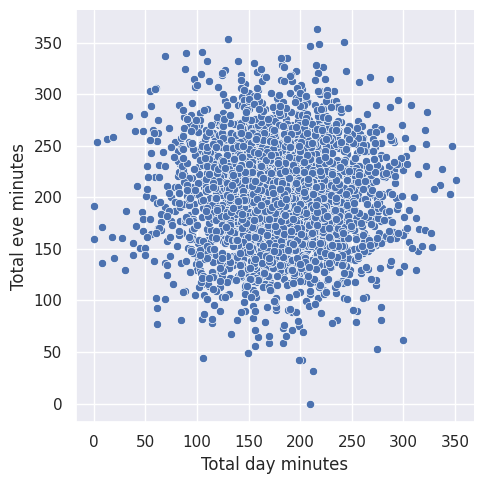

In [ ]:
# Surface plot
sns.relplot(data=df, x="Total day minutes", y="Total eve minutes",  kind="scatter")

- A surface plot is a type of 3D plot that displays a surface in a 3D coordinate system. It is typically used to visualize the relationship between three variables.

- The above plot is a  scatter plot, with the Total day minutes and Total eve minutes as the x and y axis variables. The kind parameter is set to "scatter" to create a scatter plot.

### 3D Scatter Plot

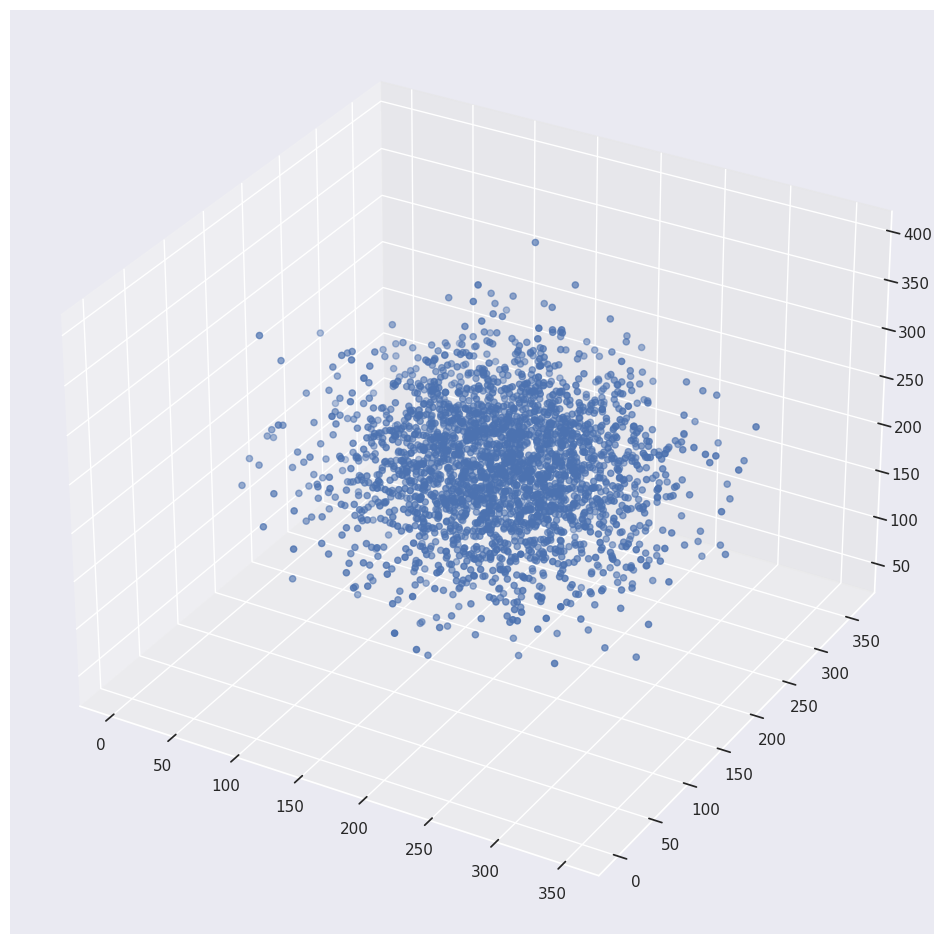

In [ ]:
# 3D scatter plot


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals =df["Total day minutes"]
sequence_containing_y_vals = df["Total eve minutes"]
sequence_containing_z_vals = df["Total night minutes"]


ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

- A 3D scatter plot is a type of plot where the values of three variables are represented as points in three-dimensional space. Each point on the plot represents a set of three values. The position of each point in the 3D space is determined by the values of the three variables.

- We can observe a 3D scatter plot using the "Total day minutes", "Total eve minutes" and "Total night minutes" columns from the data. Thus the distribution of the three variables can be seen in the three-dimensional space.

### Bubble Plot

<Axes: xlabel='Total day minutes', ylabel='Total night minutes'>

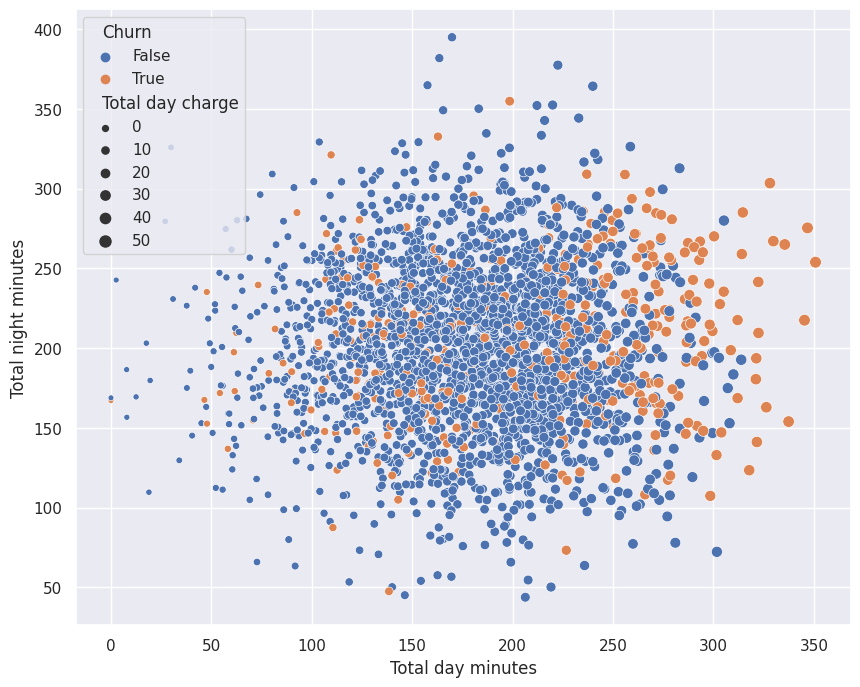

In [ ]:
# Bubble plot
sns.scatterplot(data=df, x="Total day minutes", y="Total night minutes", size="Total day charge", hue="Churn")


<Axes: xlabel='Total day minutes', ylabel='Total day charge'>

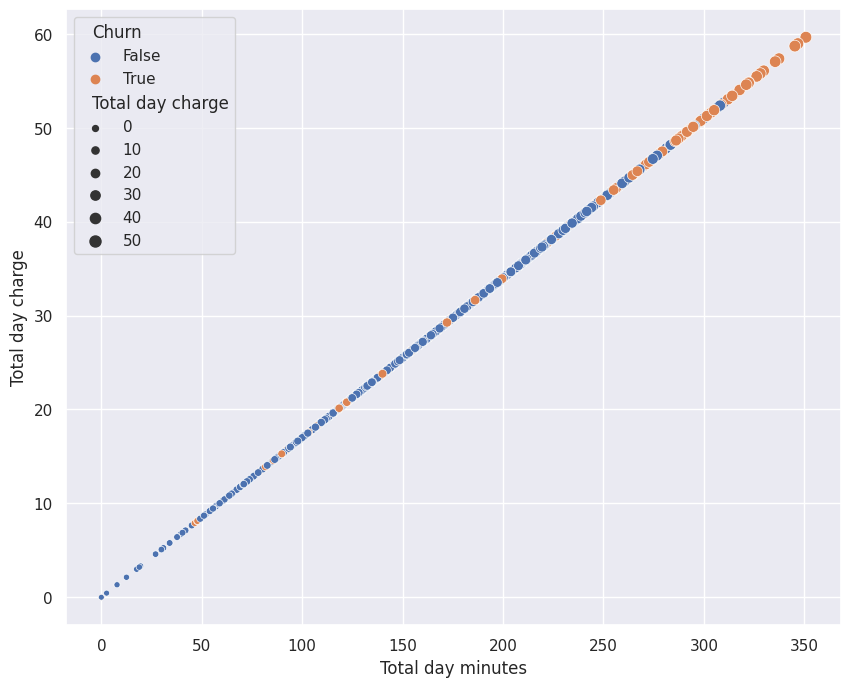

In [ ]:
# Bubble plot
sns.scatterplot(data=df, x="Total day minutes", y="Total day charge", size="Total day charge", hue="Churn")


- A bubble plot is a type of scatter plot that displays data points as bubbles, where the size of each bubble corresponds to a third variable. It is useful for displaying three-dimensional data.

- The above bubble plots the Total day minutes against Total night minutes, with the size of each bubble representing the Total day charge, and the color of each bubble representing whether the customer churned or not.
- We can also observe that most of the churning customers are people with high charge and the talking minutes are even quite high

### Stacked Barplot

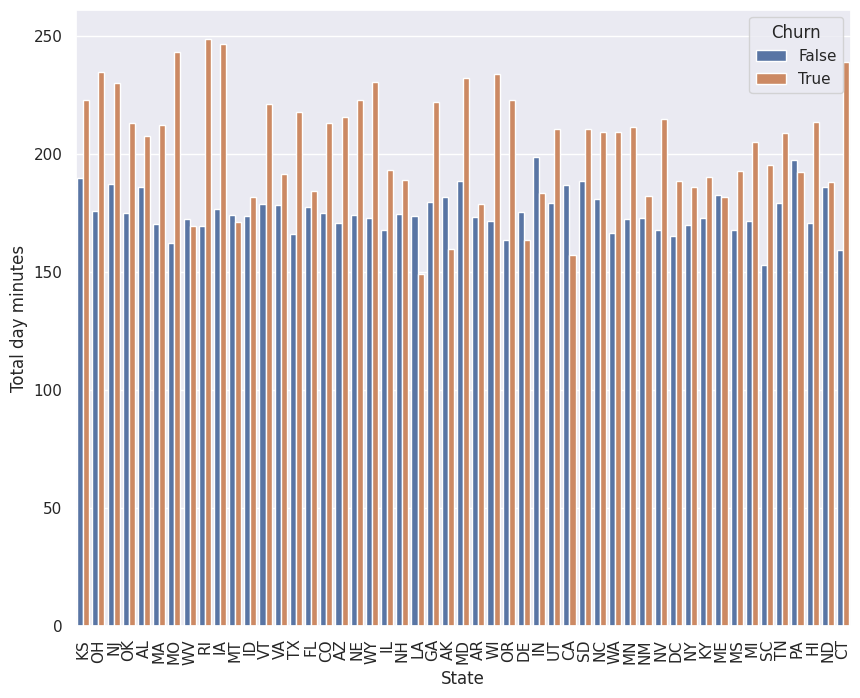

In [ ]:
# Stacked bar plot
x = sns.barplot(data=df, x="State", y="Total day minutes", hue="Churn", errorbar=None)
x.tick_params(axis='x', rotation=90)

- A stacked bar plot is a chart that displays multiple variables for each category, where each variable is represented by a different color stacked on top of each other. In this plot, the length of each stack represents the total value of the variables for each category. It is useful for comparing the distribution of variables across categories.

- The above code creates a stacked bar plot using Seaborn module. It displays the "Total day minutes" for each state, separated by the "Churn" variable, with error bars disabled. 
- The churn is common across various states but most churning customers are them having high total day minutes

### Grouped Barplot

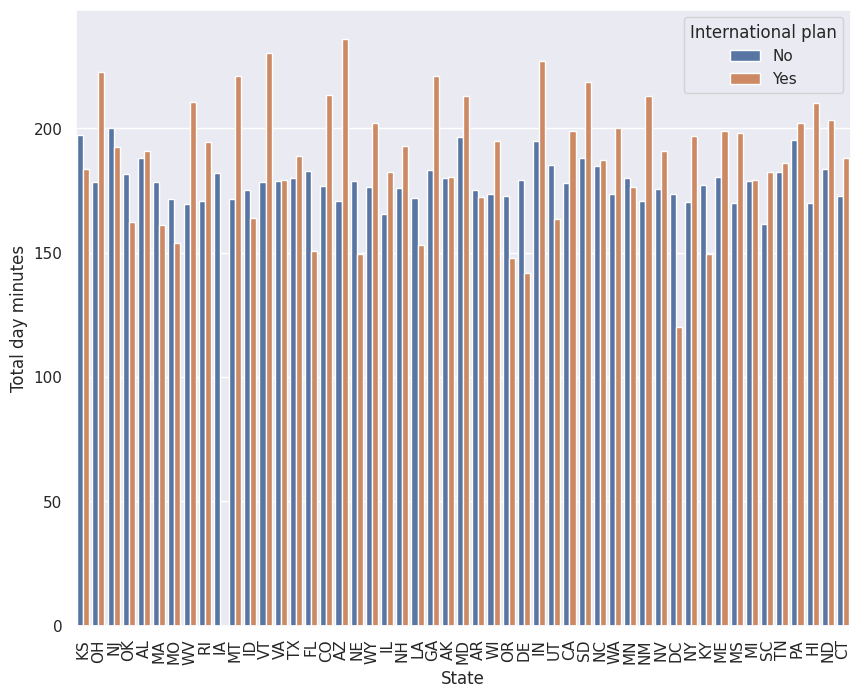

In [ ]:
# Grouped bar plot
x = sns.barplot(data=df, x="State", y="Total day minutes", hue="International plan", errorbar=None)
x.tick_params(axis='x', rotation=90)

- A grouped bar plot displays multiple bars side-by-side within each group to compare different categories. In this type of plot, each bar represents a category, and the height of the bar represents the value of the variable being plotted.

- The above code creates a grouped bar plot where each bar represents the Total day minutes of each State, and the bars are grouped based on whether the customer has an International plan or not. 
- The customers with high day time also have high international preferance

### Waterfall plot

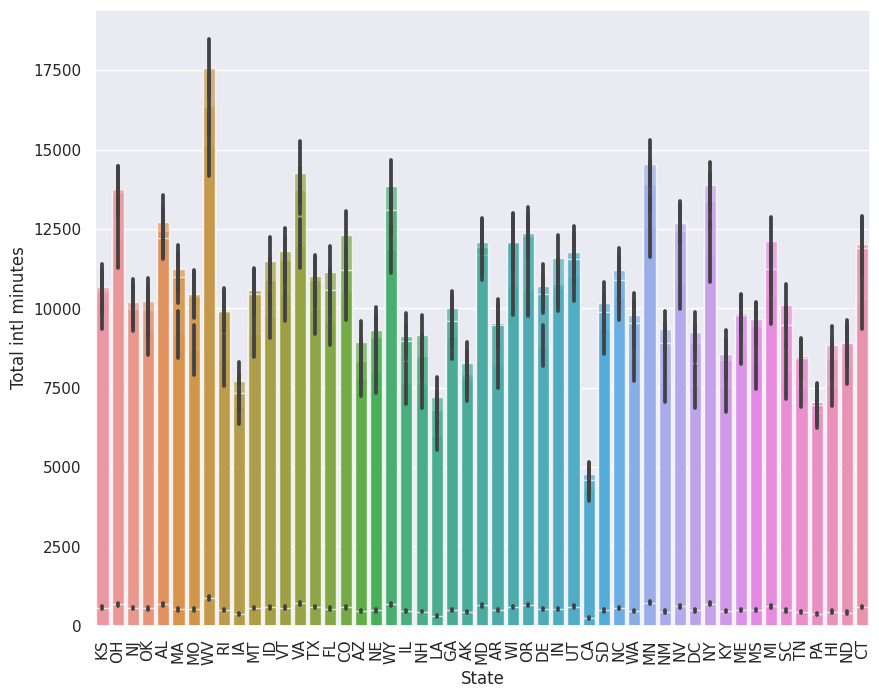

In [ ]:
# Waterfall plot
x1=sns.barplot(data=df, x="State", y="Total day minutes", estimator=sum)
x2=sns.barplot(data=df, x="State", y="Total eve minutes", estimator=sum, alpha=0.7)
x3=sns.barplot(data=df, x="State", y="Total night minutes", estimator=sum, alpha=0.7)
x4=sns.barplot(data=df, x="State", y="Total intl minutes", estimator=sum, alpha=0.7)
x1.tick_params(axis='x', rotation=90)

- A waterfall plot is a visual representation of a series of changes in value. It is commonly used in finance to show changes in stock prices or in project management to show changes in budget. The bars of the chart are stacked on top of each other and the height of each bar represents the change in value.

- The above code creates a waterfall plot by stacking four bar plots on top of each other. Each bar plot represents the total minutes used for a different type of call (day, evening, night, and international) for each state. 
- We can observe that WV state has the most minutes as compared to any other state

### Parallel Coordinates plot

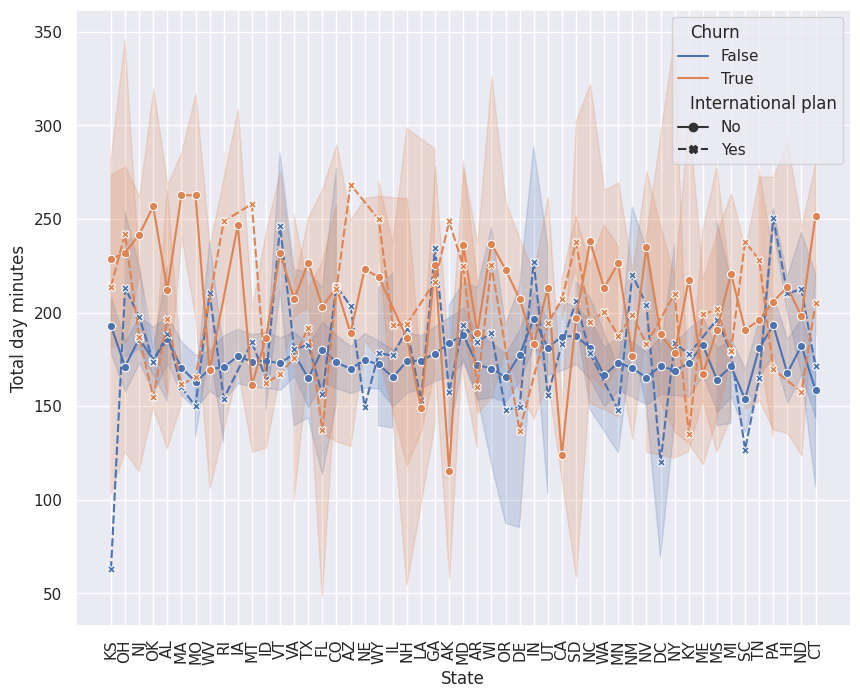

In [ ]:
# Parallel coordinates
x = sns.lineplot(data=df, x="State", y="Total day minutes", hue="Churn", style="International plan", markers=True)
x.tick_params(axis='x', rotation=90)

- Parallel coordinates plot is a type of visualization used for multivariate data analysis, where each variable is represented by a vertical axis and lines connect points with similar values. It can help to identify patterns and relationships between variables.

- The above code creates a parallel coordinates plot , where the 'State' variable is plotted on the x-axis and 'Total day minutes' on the y-axis, with hue and style attributes representing the 'Churn' and 'International plan' variables, respectively. This plot shows the relationship between 'State', 'Total day minutes', 'Churn', and 'International plan' variables, with markers representing each data point. 

- MOst customers with higher day minutes but not international plan seems to churn more.

### Treemap

In [ ]:
# Treemap
fig = px.treemap(df, path=['State', 'International plan'], values='Total day minutes')
fig.show()


- A treemap is a type of data visualization that displays hierarchical data as a set of nested rectangles. Each rectangle represents a node in the hierarchy, and the area of the rectangle corresponds to the value of the node.

- The above code above creates a treemap which displays the total day minutes for each state, grouped by whether the customer has an international plan or not. This chart shows the relative size of each rectangle, with larger rectangles representing higher values.
- We can observe that CA, PA, LA and IA have the lowest values whereas the states WV and VA have the highest values.

### Network graph

In [ ]:
# Network graph
fig = px.scatter(df, x="Total day minutes", y="Total night minutes", color="State", hover_data=['Churn'])
fig.update_traces(mode='markers+text', textposition='top center')
fig.show()

- A network graph is a visualization tool that represents the relationships between nodes in a network. The connections between nodes are represented by edges, and the nodes can be grouped or colored based on some attributes.

- The above code creates a scatter plot where the x-axis represents the "Total day minutes" and the y-axis represents the "Total night minutes" of each datapoint. The plot is colored based on the "State" attribute, and additional information about the "Churn" attribute is displayed when hovering over the datapoints. 
- We can observe that most of the datapoints are clustered between 100-250 call minutes of night whereas there are also some calls which are greater than 300 minutes of time.

### Word cloud

In [ ]:
# Word cloud
fig = px.imshow(df["State"].value_counts().reset_index().T, color_continuous_scale='YlOrRd')
fig.update_layout(title="State Word Cloud")
fig.show()

- A word cloud is a visualization technique that displays the most frequently occurring words in a text or a dataset. In a word cloud, the words are typically represented graphically, with the size or color of the word indicating its frequency or importance.

- The above code is creating a word cloud visualization of the "State" column which takes the count of each state value as input. 


### Radar chart

In [ ]:
# Radar chart
fig = px.line_polar(df, r="Total day minutes", theta="State", line_close=True)
fig.update_traces(fill='toself')
fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



- A radar chart is a graphical method of displaying multivariate data in the form of a two-dimensional chart of three or more quantitative variables represented on axes starting from the same point. It is also known as a spider chart or a star chart.

- The above code creates a radar chart which displays the "Total day minutes" variable for each state in the dataset. 

- We can observe that there are some spikes in the data for NY,CO and OH states where the total day minutes are around ~350 mins

### Paralle coordinates

In [ ]:
# Parallel coordinates
fig = px.parallel_coordinates(df, color="Churn", dimensions=["Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes"])
fig.show()

- Parallel coordinates is a data visualization technique that is used to display multi-dimensional data on a 2D plot. It is used to visualize how each dimension contributes to the overall pattern in the data. In parallel coordinates, each dimension is represented by a vertical axis and each data point is represented by a line that passes through each axis at its corresponding value.

- The above code creates a parallel coordinates plot for the "Total day minutes", "Total eve minutes", "Total night minutes", and "Total intl minutes" and the color of each line is determined by the "Churn" variable. Thus The resulting chart visualizes the relationship between the variables and the churn outcome.
- We can observe that while comparing the day, evening and night calls, there is atleast a call at night for 43 mins where as there are some calls during day and evening for 0 mins and the maximum call time is also at night  with 395 mins followed by evening and then day calls.

### 3D Scatter Plot

In [ ]:
# 3D scatter plot
fig = px.scatter_3d(df, x="Total day minutes", y="Total eve minutes", z="Total night minutes", color="State", size="Total intl minutes", hover_data=['Churn'])
fig.show()

- A 3D scatter plot is a type of visualization that displays data points in a three-dimensional space, where each point is represented by its values on three different variables. This type of plot is useful for exploring the relationships between three variables at the same time.

- The above code above uses creates a 3D scatter plot, where the variables Total day minutes, Total eve minutes, and Total night minutes are represented on the x, y, and z-axes, respectively. The points are colored by the State variable, and the size of each point is determined by the value of the Total intl minutes variable. Additionally, the Churn variable is included as a hover data, allowing for further exploration of the data. Thus the resulting plot is interactive.

### Sunburst Chart

In [ ]:
# Sunburst chart
fig = px.sunburst(df, path=['State', 'International plan', 'Churn'], values='Total day minutes')
fig.show()

- A sunburst chart is a type of hierarchical chart that displays data in a circular format, with each level of the hierarchy represented by a ring. The innermost ring represents the root of the hierarchy, and the outer rings represent subcategories. The size of each segment represents the value of the data being displayed.

- The above code creates a sunburst chart which represents the 'Total day minutes' data for each state, separated by whether they have an international plan or not, and whether they churned or not. 
- The interpretation would be very clear from this chart as compared to all othr charts due to the labels given along the chart which are easy to understand

### Violin plot

In [ ]:
# Violin plot
fig = px.violin(df, y="Total day minutes", x="International plan", color="Churn", box=True, points="all")
fig.show()

- A violin plot is a statistical plot that displays the distribution of a continuous variable across different categories. It is similar to a box plot, but includes a kernel density estimation of the data.

- The above code creates a violin plot using the Plotly Express module, where the y-axis represents the "Total day minutes" variable, and the x-axis represents the "International plan" variable. The plot is also colored by the "Churn" variable and includes boxes and individual data points.
- We can observe that most churn rate for total day mins is with no international calls and can have any range of day call time.

### heatmap

In [ ]:
# Heatmap
fig = px.imshow(df.corr())
fig.show()

- We can observe that columns ike total intl call is highly correlated with highly intl charges and similarly night calls are correlated with night charge and that would exist for sure as the call time increases the charge values would also increase even during day, night or evening.
- We can also observe that the churn is correlated with customer service calls which shows that customer service plays a major role in determining the churn.

### Density Contour plot

In [ ]:
# Density contour plot
fig = px.density_contour(df, x="Total day minutes", y="Total eve minutes", color="Churn")
fig.show()

- Density contour plot is a way of representing the density of data points in a 2D space using contour lines. It shows regions of higher or lower density in the data.
- The above code creates a density contour plot using the Total day minutes and Total eve minutes variables as the x and y axes, respectively, and coloring the plot by the Churn variable.Thus showing the density of churned and non-churned customers in the space of these two variables.
- We can observe some externally populated contour for customers who have churned for ex, we have a churned customer where total day mins are 40 and evening mins are 180. Similarly, one at right with day minutes 340 and night mins 220.

### Funnel Chart

In [ ]:
# Funnel chart
fig = px.funnel(df, x="Total night minutes", y="State")
fig.show()

- A funnel chart is a type of chart that represents a process with a decreasing number of values at each stage. The chart has a trapezoidal shape where the top represents the initial value, and the bottom represents the final value.

- The above code creates a funnel chart using the Plotly Express library which shows the total number of minutes used during the day for each state, with the states arranged in descending order of total minutes used.
- Even using this chart, we can observe the spikes for some states like WV.

### scatter-line chart

In [ ]:
# scatter-line chart
df_candlestick = df.iloc[0:10] # selecting first 10 rows for demonstration purposes
fig = px.scatter(df_candlestick, x="State", y="Total day minutes", color="Churn", hover_data=['Total eve minutes'])
fig.update_traces(mode='lines+markers')
fig.show()

The above code selects the first 10 rows of the input data and creates a scatter plot with the "State" variable on the x-axis and the "Total day minutes" variable on the y-axis. The plot points are color-coded by the "Churn" variable, and additional data on "Total eve minutes" is displayed when hovering over the plot points. The plot points are displayed as both lines and markers.

### 3D Lineplot

In [ ]:
# 3D line plot
fig = px.line_3d(df, x="Total day minutes", y="Total eve minutes", z="Total night minutes", color="Churn")
fig.show()

- A 3D line plot is a graph that displays a set of data points as a continuous line in a 3D space. It is useful when visualizing data with three variables. The x, y, and z-axis represent the values of each variable.

- The above code creates a 3D line plot. The x, y, and z-axis are set to "Total day minutes", "Total eve minutes", and "Total night minutes" columns from the dataframe "df". The "color" parameter is set to "Churn" column to distinguish between churn and non-churn customers. The resulting graph shows how the total day, evening, and night minutes are distributed among churn and non-churn customers.

### Parallel Categories plot

In [ ]:
# Parallel categories plot
fig = px.parallel_categories(df, color="Churn", dimensions=["State", "International plan", "Voice mail plan", "Customer service calls"])
fig.show()

- Parallel categories plot is a visualization tool to represent categorical data and their relationships between each other using parallel lines. Each line represents a category and its intersection with other lines shows the relationship between those categories.

- The above code creates a parallel categories plot that displays the relationship between the 'State', 'International plan', 'Voice mail plan', and 'Customer service calls' dimensions, with 'Churn' represented by color.
- This plot will show how these dimensions are related to each other and their impact on churn.

### Boxplot

In [ ]:
# Box plot
fig = px.box(df, y="Total day minutes", x="Churn", color="International plan")
fig.show()

### Dynamic Scatter Plot

In [ ]:
# Create the figure
fig = px.scatter(df, x="Total day minutes", y="Total night minutes", animation_frame="Account length", 
                 animation_group="Churn", color="Churn", size="Customer service calls", 
                 hover_name="State", log_x=True, range_x=[100, 350], range_y=[50, 300])

# Add labels and title
fig.update_layout(title="Telecom Churn Data", xaxis_title="Total day minutes", yaxis_title="Total night minutes")

# Show the plot
fig.show()

- A dynamic scatter plot is a plot that displays data points with two variables, where the plot can be animated over time or any other category variable, such as gender or geographic location. It is useful for identifying patterns and trends in large datasets that change over time or across categories.

- The above code creates a dynamic scatter plot that displays the relationship between Total day minutes and Total night minutes, animated by the Account length and colored by the Churn status. The size of the markers corresponds to the number of Customer service calls, and the plot is logarithmically scaled on the x-axis. The plot title is "Telecom Churn Data," and the x and y axis labels are "Total day minutes" and "Total night minutes,".

### Custom Bar plot

In [ ]:
# Bar plot showing the count of churned and non-churned customers for each area code
# Create the figure
fig = px.histogram(df, x="Area code", color="Churn", barmode="group")

# Add labels and title
fig.update_layout(title="Count of churned and non-churned customers for each area code", xaxis_title="Area code", yaxis_title="Count")

# Show the plot
fig.show()

- The above histogram displays the count of churned and non-churned customers for each area code, with different colors for each churn status. The plot is created using the 'barmode' argument as 'group' which means the bars of churned and non-churned customers for each area code will be grouped together. 

### Custom Box plot

In [ ]:
# Box plot showing the distribution of customer service calls for each churn status
# Create the figure
fig = px.box(df, x="Churn", y="Customer service calls")

# Add labels and title
fig.update_layout(title="Distribution of customer service calls for each churn status", xaxis_title="Churn status", yaxis_title="Customer service calls")

# Show the plot
fig.show()

- The above code creates a box plot using the Plotly Express module. The plot displays the distribution of the number of customer service calls for each churn status. The x-axis represents the churn status (whether the customer has churned or not), and the y-axis represents the number of customer service calls. The box plot shows the median (orange line), the interquartile range (box), the range (whiskers), and any outliers (points beyond the whiskers) for each category. 

### Custom Scatter Plot

In [ ]:
# Scatter plot showing the relationship between the number of voice mail messages and the number of customer service calls:
# Create the figure
fig = px.scatter(df, x="Number vmail messages", y="Customer service calls", color="Churn")

# Add labels and title
fig.update_layout(title="Relationship between number of voice mail messages and number of customer service calls", xaxis_title="Number of voice mail messages", yaxis_title="Number of customer service calls")

# Show the plot
fig.show()

- The above code creates a scatter plot which shows the relationship between two variables - "Number vmail messages" and "Customer service calls" from the input dataset "df". The plot is colored based on the Churn status. The plot title is "Relationship between number of voice mail messages and number of customer service calls", and the x and y axis labels are "Number of voice mail messages" and "Number of customer service calls", respectively. 
- This plot identifies if there is any relationship or pattern between the number of voice mail messages and the number of customer service calls, and how this relationship may differ for customers who churned vs. those who did not churn.

### Line plot using pivot table

In [ ]:
# Line plot showing the total day charge and total night charge for each state:
# Create a pivot table to calculate the total day charge and total night charge for each state
pv = pd.pivot_table(df, values=["Total day charge", "Total night charge"], index=["State"], aggfunc=np.sum)

# Create the figure
fig = px.line(pv, x=pv.index, y=["Total day charge", "Total night charge"])

# Add labels and title
fig.update_layout(title="Total day charge and total night charge for each state", xaxis_title="State", yaxis_title="Charge")

# Show the plot
fig.show()

- The above code creates a pivot table "pv", which calculates the total day and night charges for each state based on the input data frame "df." The code then uses Plotly Express module to create a line plot with the x-axis representing each state and the y-axis showing the total day and night charges. 
- This plot is useful for comparing the day and night charges for different states and identifying any patterns or trends.

In [ ]:

# Create box plots for each numerical column in the DataFrame
fig = px.box(df, y=["Account length", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge",
                    "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls",
                    "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls"])

# Add title and axis labels
fig.update_layout(title="Box plots of numerical variables", xaxis_title="Variable", yaxis_title="Value")

# Show the plot
fig.show()


- The above code creates a set of box plots for each numerical column in the DataFrame using Plotly Express module. Each box plot represents the distribution of a variable, with the box representing the interquartile range (IQR) of the data, the whiskers extending to the furthest data points within 1.5 times the IQR, and any outliers beyond the whiskers.

### Swarm Plot

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



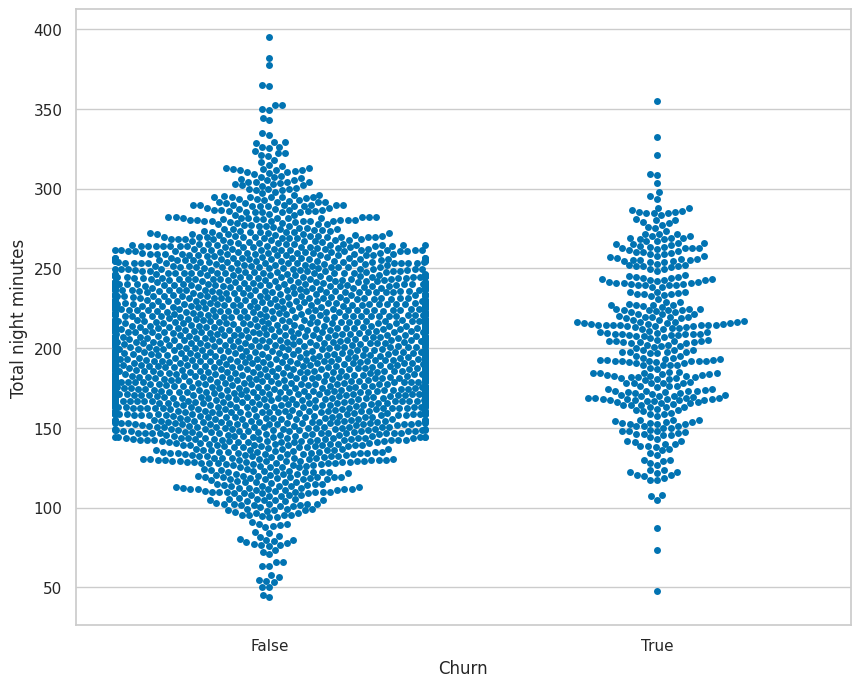

In [ ]:
# Create a swarm plot of the night minutes
sns.swarmplot(x="Churn", y="Total night minutes", data=df)

# Show the plot
plt.show()

- Swarm plot is a categorical scatter plot that shows individual data points along with the density of the data. It is particularly useful for visualizing the distribution of small to moderate-sized datasets.

- The above code creates a swarm plot using Seaborn module, where the x-axis represents the Churn (categorical variable) and the y-axis represents Total night minutes (continuous variable) from the given dataset 'df'. Each data point is represented by a dot on the plot.

- The resulting plot identifies patterns or trends in the distribution of Total night minutes between the Churn and Non-Churn categories.
-  We can observe that the churn of people for high night times are less as compared to other.

In [ ]:
# Scatter plot of "Total day charge" vs "Total day minutes" colored by churn status:
fig = px.scatter(df, x="Total day minutes", y="Total day charge", color="Churn")
fig.show()


In [ ]:
# Box plot of "Total eve minutes" by international plan status:
fig = px.box(df, x="International plan", y="Total eve minutes")
fig.show()


- We can observe from the box plot that the median is around 200 both for international and non-intl calls over total evening mins

In [ ]:
# Histogram of "Total intl minutes" with 20 bins:
fig = px.histogram(df, x="Total intl minutes", nbins=20)
fig.show()


- We can observe that the total intl calls has a mean arounf 10 mins and range fro  0 to 20 mins at max. It may be because intl calls are expensive

In [ ]:
# Scatter plot of "Total day minutes" vs "Total eve minutes" with marker size corresponding to "Total night minutes":
fig = px.scatter(df, x="Total day minutes", y="Total eve minutes", size="Total night minutes")
fig.show()


### Scatter Matrix

In [ ]:
# Scatter matrix of all numeric columns:
fig = px.scatter_matrix(df, dimensions=["Account length", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls"])
fig.show()


- A scatter matrix is a plot that displays pairwise relationships between multiple variables in a dataset. It's useful for visualizing patterns and correlations between variables. The scatter matrix consists of scatter plots of each pair of variables in the dataset.

- The above code creates a scatter matrix for all the numeric columns in the given dataset (df). The dimensions parameter specifies the columns to be included in the scatter matrix. The resulting plot will have scatter plots of all possible pairs of the selected columns.

### Donut Chart

In [ ]:
# Donut chart of churn status:
pv = df["Churn"].value_counts().reset_index()
pv.columns = ["Churn", "count"]
fig = px.pie(pv, values="count", names="Churn", hole=0.6)
fig.show()


- A donut chart is a circular chart with a hole in the center. It displays data as slices of a circle and is similar to a pie chart. The hole in the center can be used to display additional information or to make the chart more visually appealing.

- The above code creates a donut chart for the Churn status data in the dataframe. It first creates a pivot table for the Churn column with value counts and then uses the Plotly module to create a pie chart with a hole size of 0.6 in the center, displaying the Churn and Non-Churn count values as slices. 


In [ ]:
# Line plot of "Total day minutes" by customer service calls:
pv = pd.pivot_table(df, values=["Total day minutes"], index=["Customer service calls"], aggfunc=np.mean)
fig = px.line(pv, x=pv.index, y="Total day minutes")
fig.show()


- The above code plots a line chart with Customer service calls on the x-axis and mean Total day minutes on the y-axis. The resulting chart will show the trend of how Total day minutes change with different values of Customer service calls.

### Violin Plot

In [ ]:
# Violin plot of "Total night minutes" by churn status:
fig = px.violin(df, y="Total night minutes", x="Churn", box=True, points="all", color="Churn")
fig.show()


### Pie-chart

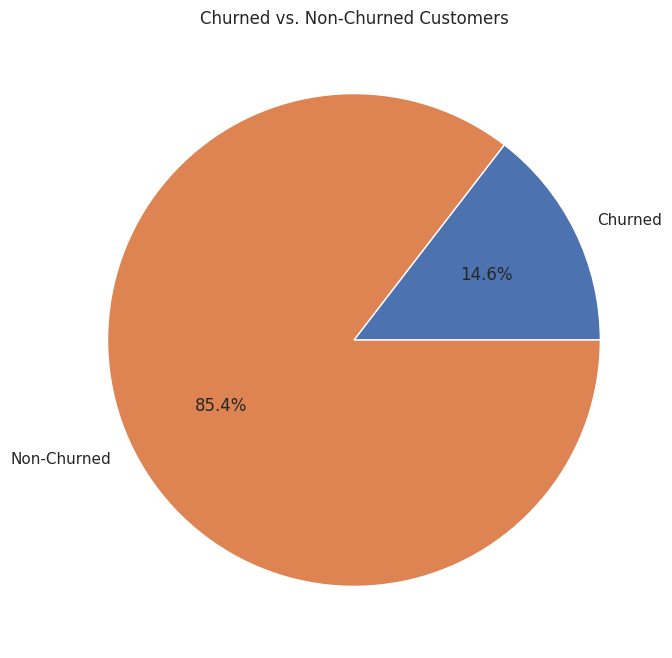

In [ ]:

churned = df[df["Churn"] == True]["Churn"].count()
non_churned = df[df["Churn"] == False]["Churn"].count()

labels = ["Churned", "Non-Churned"]
sizes = [churned, non_churned]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Churned vs. Non-Churned Customers")
plt.show()


- A pie chart is a circular chart that represents data as slices of a pie. Each slice corresponds to a portion of the whole, and the size of the slice indicates its relative value to the whole.

- The above code counts the number of churned and non-churned customers from a dataset and creates a pie chart to represent the proportions. 

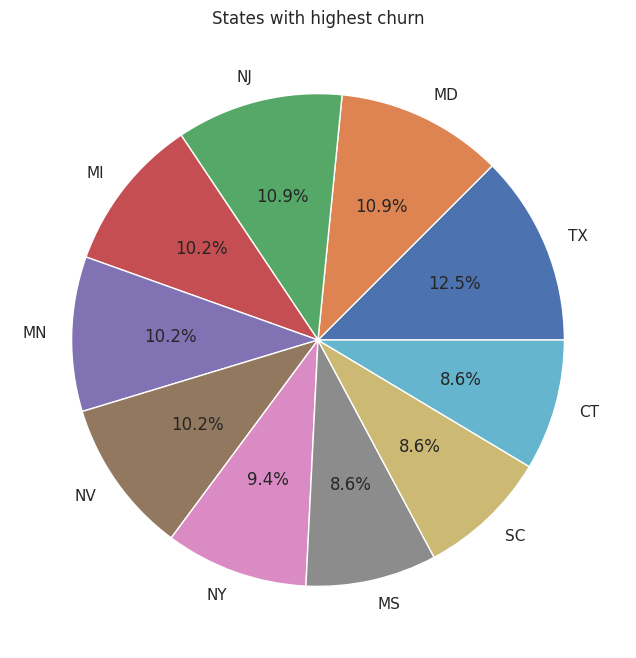

In [6]:
# Filter the data for churned customers
churned_data = df[df["Churn"] == True]

# Count the number of churned customers by state
churned_by_state = churned_data.groupby(["State"])["Churn"].count().sort_values(ascending=False)

# Keep the top 10 states with highest churn
top_states = churned_by_state[:10]

# Create a 2D pie chart
sizes = top_states.values
labels = top_states.index

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title("States with highest churn")

plt.show()


In [7]:
import plotly.graph_objects as go

# Filter the data to only include churned customers
churned_df = df[df["Churn"] == True]

# Group the data by state and count the number of churned customers in each state
state_counts = churned_df.groupby("State")["Churn"].count()

# Create a 3D pie chart showing the churned data by state
fig = go.Figure(data=[go.Pie(labels=state_counts.index, values=state_counts.values, hole=.3)])
fig.update_layout(title="Churned Customers by State", scene=dict(aspectratio=dict(x=1, y=1, z=1)))
fig.show()


- Now we can observe the churn rate for each of the state separately

### Nested Pie-chart

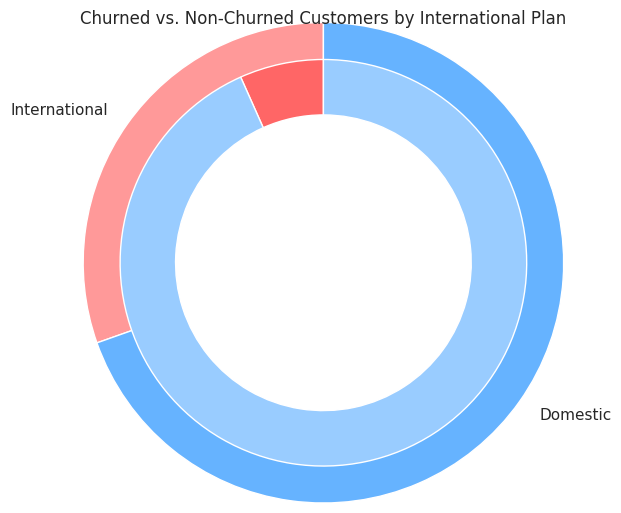

In [ ]:

international_churned = df[(df["Churn"] == True) & (df["International plan"] == "Yes")]["Churn"].count()
international_non_churned = df[(df["Churn"] == False) & (df["International plan"] == "Yes")]["Churn"].count()
domestic_churned = df[(df["Churn"] == True) & (df["International plan"] == "No")]["Churn"].count()
domestic_non_churned = df[(df["Churn"] == False) & (df["International plan"] == "No")]["Churn"].count()

labels = ["International", "Domestic"]
sizes_churned = [international_churned, domestic_churned]
sizes_non_churned = [international_non_churned, domestic_non_churned]

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

outer_colors = ["#ff9999", "#66b3ff"]
inner_colors = ["#ff6666", "#99ccff"]

wedges, _ = ax.pie(sizes_churned, radius=1.3, labels=labels, colors=outer_colors, startangle=90)
wedges2, _ = ax.pie(sizes_non_churned, radius=1.1, colors=inner_colors, startangle=90)

plt.setp(wedges, width=0.3, edgecolor='white')
plt.setp(wedges2, width=0.3, edgecolor='white')

ax.set_title("Churned vs. Non-Churned Customers by International Plan")
plt.show()


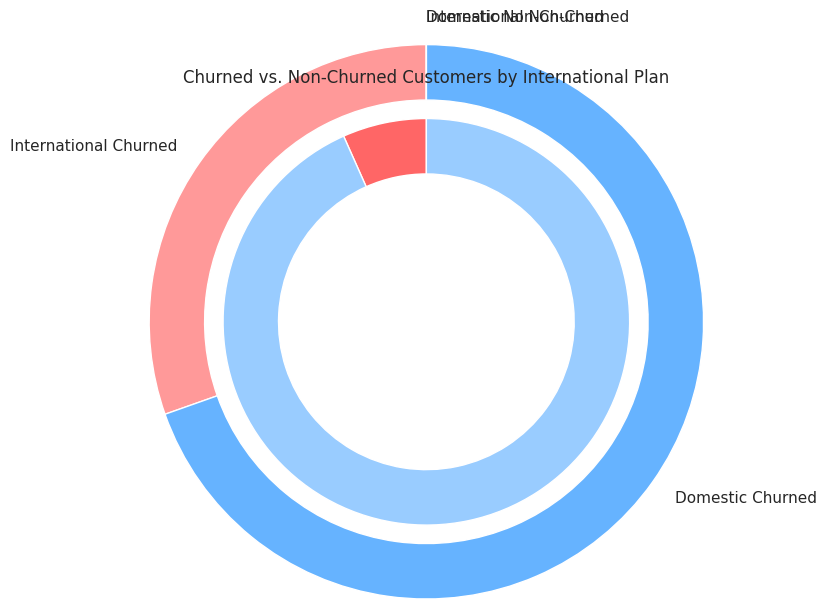

In [11]:
international_churned = df[(df["Churn"] == True) & (df["International plan"] == "Yes")]["Churn"].count()
international_non_churned = df[(df["Churn"] == False) & (df["International plan"] == "Yes")]["Churn"].count()
domestic_churned = df[(df["Churn"] == True) & (df["International plan"] == "No")]["Churn"].count()
domestic_non_churned = df[(df["Churn"] == False) & (df["International plan"] == "No")]["Churn"].count()

labels = ["International Churned", "Domestic Churned", "International Non-Churned", "Domestic Non-Churned"]
sizes_churned = [international_churned, domestic_churned, 0, 0]
sizes_non_churned = [0, 0, international_non_churned, domestic_non_churned]

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

outer_colors = ["#ff9999", "#66b3ff"]
inner_colors = ["#ff6666", "#99ccff"]

wedges, _ = ax.pie(sizes_churned, radius=1.5, labels=labels, colors=outer_colors, startangle=90)
wedges2, _ = ax.pie(sizes_non_churned, radius=1.1, colors=inner_colors, startangle=90)

plt.setp(wedges, width=0.3, edgecolor='white')
plt.setp(wedges2, width=0.3, edgecolor='white')

ax.set_title("Churned vs. Non-Churned Customers by International Plan")
plt.show()


- A nested pie chart is a type of chart that displays two or more pie charts within each other, where the outer chart represents the main category and the inner chart represents sub-categories or components of the outer category.

- The above code calculates the number of churned and non-churned customers for domestic and international plans, and creates a nested pie chart to visualize the data. The outer chart shows the total number of customers by plan type (International or Domestic), and the inner chart shows the percentage of churned and non-churned customers for each plan type. Different colors are used for the outer and inner charts to differentiate them.
- We can clearly observe the difference between domestic and international calls for the churn vs non-churned customers

### 3D-pie-chart

In [ ]:

# Data
labels = ["Churn", "Non-Churn"]
sizes = [df["Churn"].value_counts()[1], df["Churn"].value_counts()[0]]

# Create a 3D pie chart using Plotly
fig = px.pie(values=sizes, names=labels, title="Churn",
             color_discrete_sequence=["green", "red"],
             hole=0.3, opacity=0.8, hover_name=labels)

fig.update_traces(hoverinfo="label+percent+name", textinfo="percent+label")
fig.update_layout(title_font=dict(size=20))
fig.show()


- A 3D pie chart is a type of chart that displays data as a pie chart in a 3-dimensional format. It allows for a more visually appealing representation of data with depth and perspective.

- The above code creates a 3D pie chart using Plotly with two labels "Churn" and "Non-Churn" representing the counts of churned and non-churned customers respectively. The chart has a hole of 0.3, opacity of 0.8, and a hover name of the label values. 
- We can observed that about 14.6% churned and 85.4% non-churned customers

### Donut chart

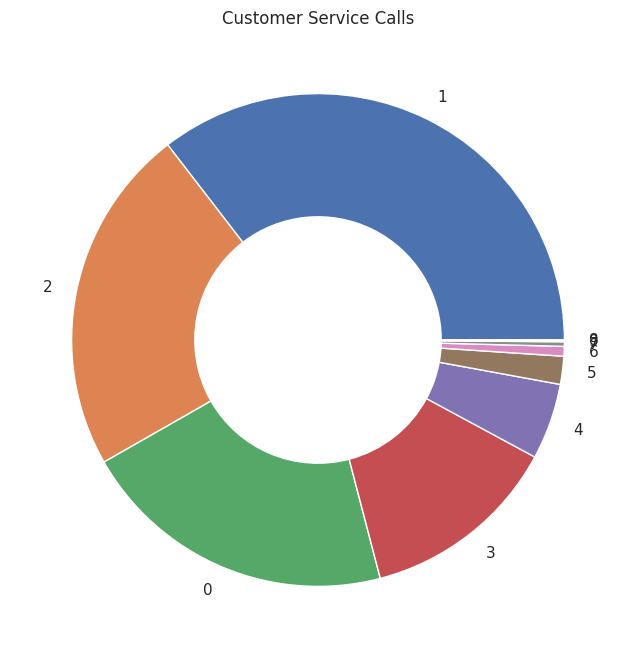

In [12]:
# Create a donut chart of the "Customer service calls" variable
counts = df["Customer service calls"].value_counts()
plt.pie(counts, labels=counts.index, radius=1, wedgeprops=dict(width=0.5))
plt.title("Customer Service Calls")
plt.show()


- The above plot shows the distribution of customer service calls for the given dataset. 

### mosaic chart

<Figure size 2000x1000 with 0 Axes>

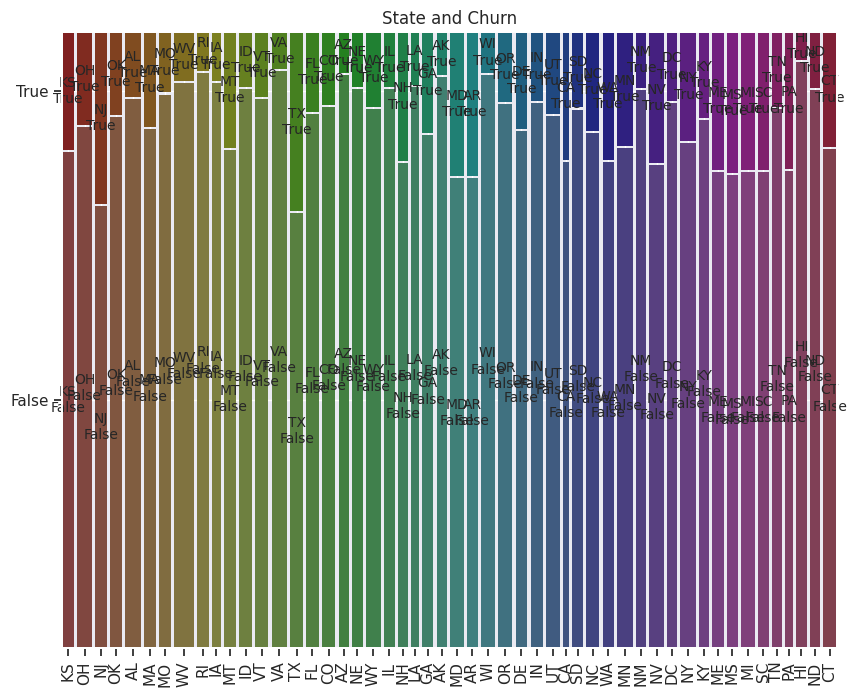

In [ ]:
# Create a mosaic chart of the "State" and "Churn" variables
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic chart of the "State" and "Churn" variables
plt.figure(figsize=(20, 10))
mosaic(df, ["State", "Churn"], label_rotation=[90, 0])
plt.title("State and Churn")
plt.show()

- A mosaic chart is a graphical representation of contingency tables in which the area of each rectangle is proportional to the number of observations it represents. It is often used to visualize the relationship between two categorical variables.

- The above code creates a mosaic chart of the "State" and "Churn" variables using the mosaic function from the statsmodels.graphics.mosaicplot module. 
- We can clearly see the different states and the churn over each state in the chart.

### Bar Chart

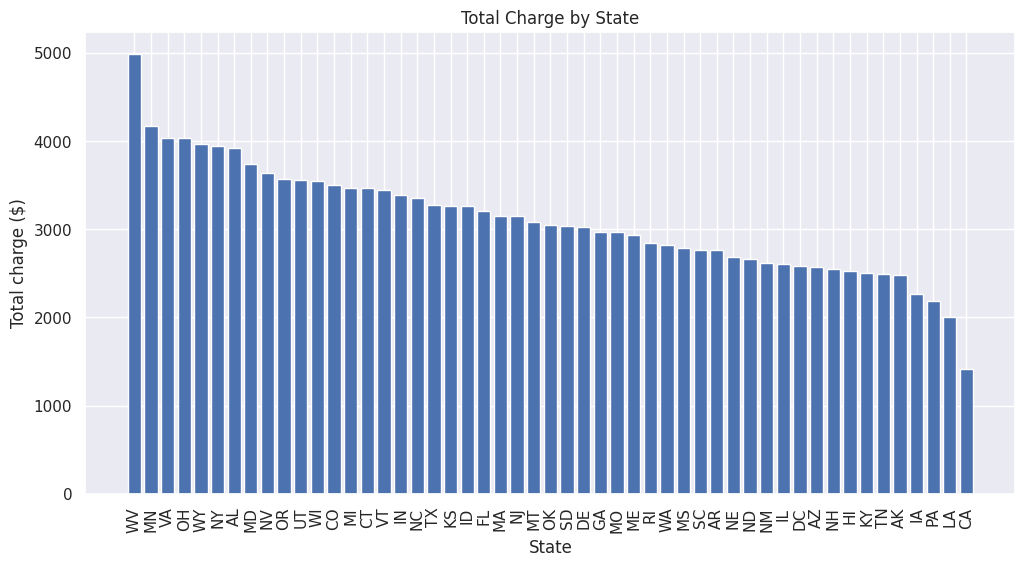

In [12]:

# calculate the total charge for each row
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']

# group the data by state and sum the total charges
charges_by_state = df.groupby('State')['Total charge'].sum()

# sort the charges by descending order
charges_by_state = charges_by_state.sort_values(ascending=False)

# plot the bar chart
plt.figure(figsize=(12,6))
plt.bar(charges_by_state.index, charges_by_state.values)
plt.xticks(rotation=90)
plt.ylabel('Total charge ($)')
plt.xlabel('State')
plt.title('Total Charge by State')
plt.show()


- We can observe the total charge per state using the bar-plot
-It can be also observed that WV and MN are the states with the highest charges

<b> Stacked bar plot

<Figure size 1200x600 with 0 Axes>

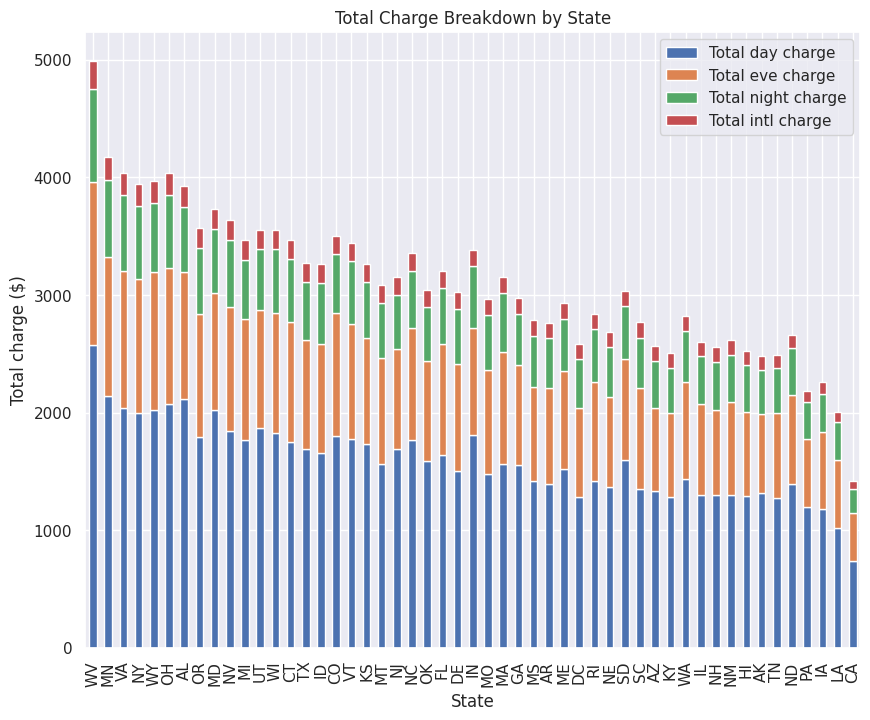

In [13]:

# create a new dataframe with just the columns we need
charges_df = df[['State', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']]

# group the data by state and sum the charges
charges_by_state = charges_df.groupby('State').sum()

# sort the charges by descending order
charges_by_state = charges_by_state.sort_values(by='Total intl charge', ascending=False)

# plot the stacked bar chart
plt.figure(figsize=(12,6))
charges_by_state.plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.ylabel('Total charge ($)')
plt.xlabel('State')
plt.title('Total Charge Breakdown by State')
plt.legend(loc='upper right')
plt.show()


- Here we can clearly observe the Total day charge, Total eve charge, Total Night Charge and Total Intl Charge for the 50 states



<b> Grouped bar chart

<Figure size 2000x2000 with 0 Axes>

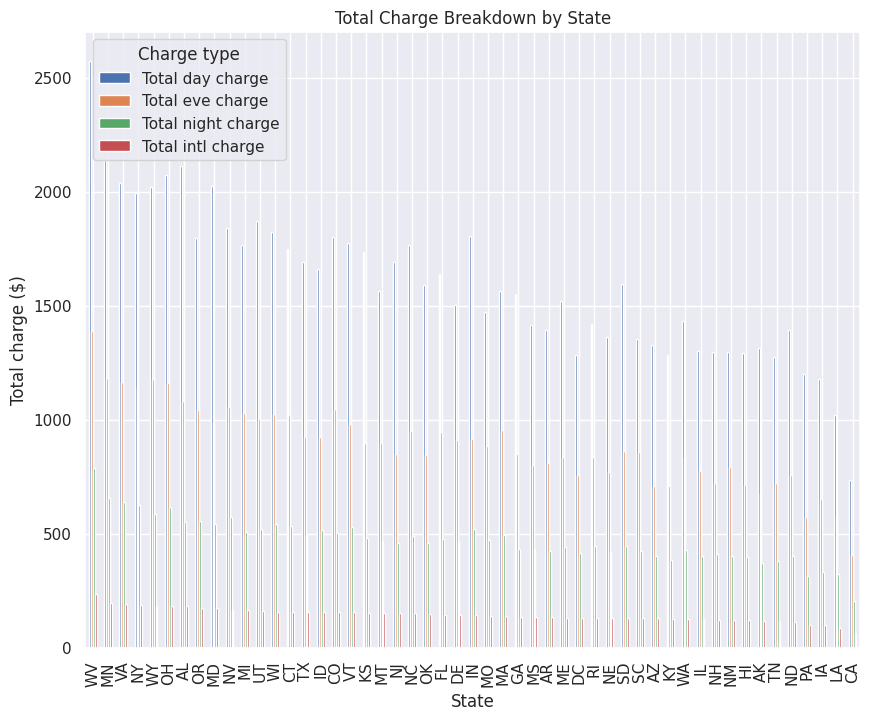

In [16]:

# create a new dataframe with just the columns we need
charges_df = df[['State', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']]

# group the data by state and sum the charges
charges_by_state = charges_df.groupby('State').sum()

# sort the charges by descending order
charges_by_state = charges_by_state.sort_values(by='Total intl charge', ascending=False)

# plot the grouped bar chart
plt.figure(figsize=(20,20))
charges_by_state.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Total charge ($)')
plt.xlabel('State')
plt.title('Total Charge Breakdown by State')
plt.legend(title='Charge type', loc='upper left')
plt.show()


- Now we unstacked the 4 categories of charge and showed it in a group bar chart 

<ipython-input-24-710614fd64ef>:6: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-24-710614fd64ef>:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



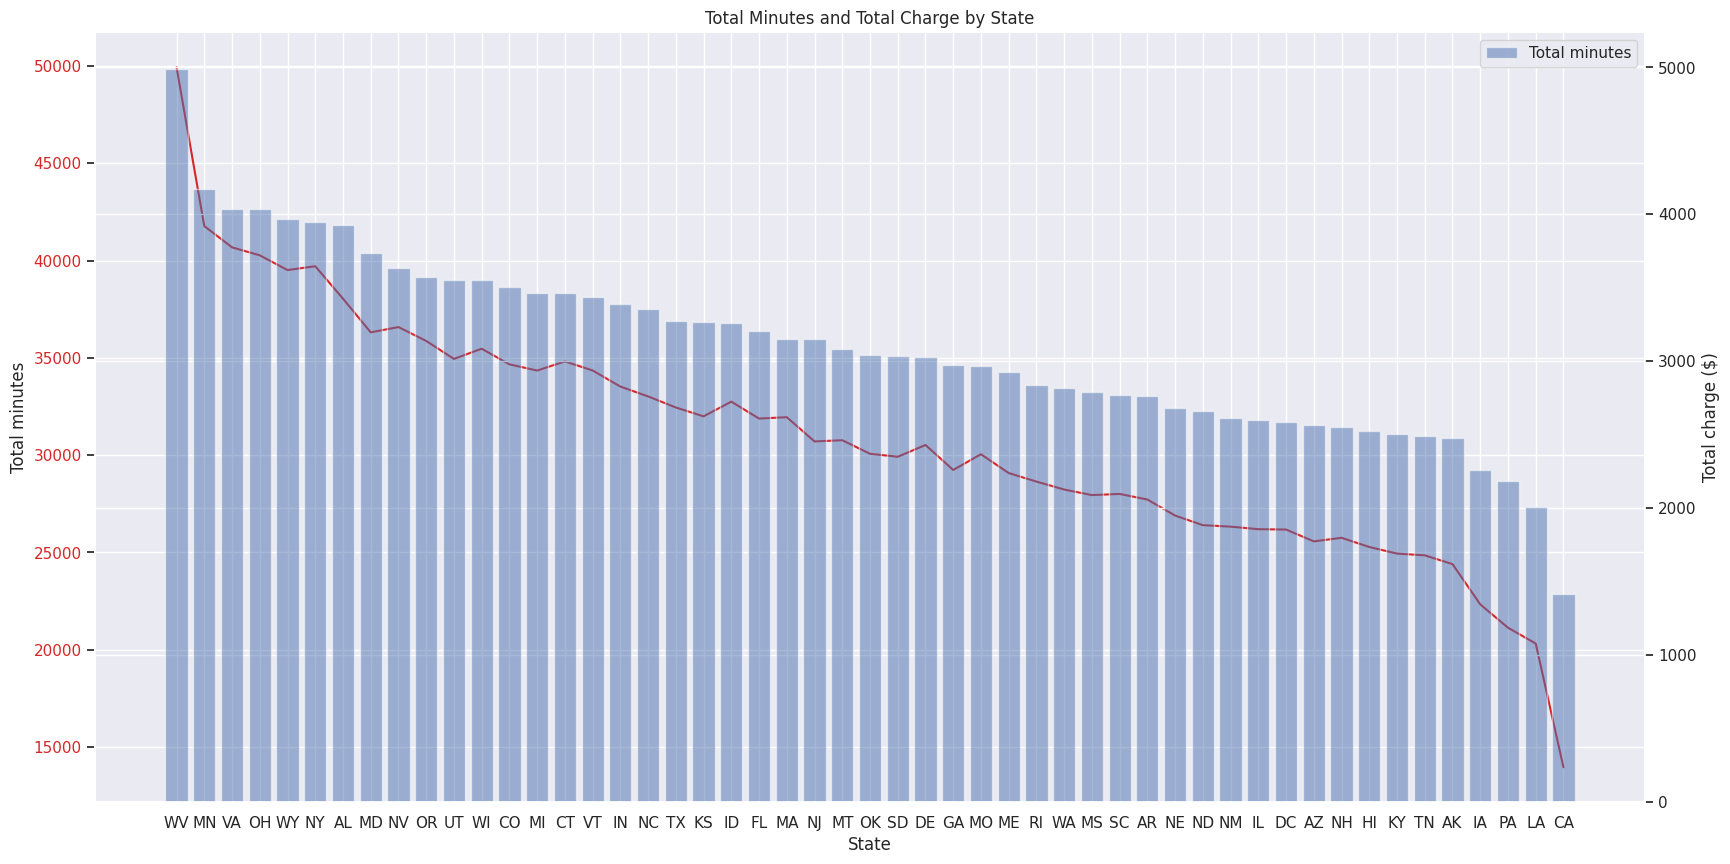

In [24]:

# create a new dataframe with just the columns we need
minutes_df = df[['State', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']]
charge_df = df[['State', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']]

# calculate the total minutes and total charges for each state
total_minutes = minutes_df.sum(axis=1)
total_charges = charge_df.sum(axis=1)

# combine the data into a single dataframe
combined_df = pd.concat([total_minutes, total_charges], axis=1, keys=['Total minutes', 'Total charge'])
combined_df['State'] = df['State']  # add back the 'State' column using the index

# group the data by state and sum the values
combined_by_state = combined_df.groupby('State').sum()

# sort the data by descending order of total charge
combined_by_state = combined_by_state.sort_values(by='Total charge', ascending=False)

# plot the combined line and bar chart
fig, ax1 = plt.subplots(figsize=(20,10))

# plot the total minutes as a line chart
ax1.plot(combined_by_state.index, combined_by_state['Total minutes'], color='tab:red')
ax1.set_xlabel('State') 
ax1.set_ylabel('Total minutes')
ax1.tick_params(axis='y', labelcolor='tab:red')

# create a second y-axis for the total charge as a bar chart
ax2 = ax1.twinx()
ax2.bar(combined_by_state.index, combined_by_state['Total charge'], alpha=0.5)
ax2.set_ylabel('Total charge ($)')
ax2.tick_params(axis='y')

# add a title and legend to the chart
plt.title('Total Minutes and Total Charge by State')
plt.legend(['Total minutes', 'Total charge'])

plt.show()


- Now we can observe the total mins and total charge as a combined line and bar chart showing Total minutes as line and total charge as bar chart.
total mins = Total day minutes + Total evening minutes + Tota Night Mins + Total Intl Mins

<ipython-input-21-3da100962d69>:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



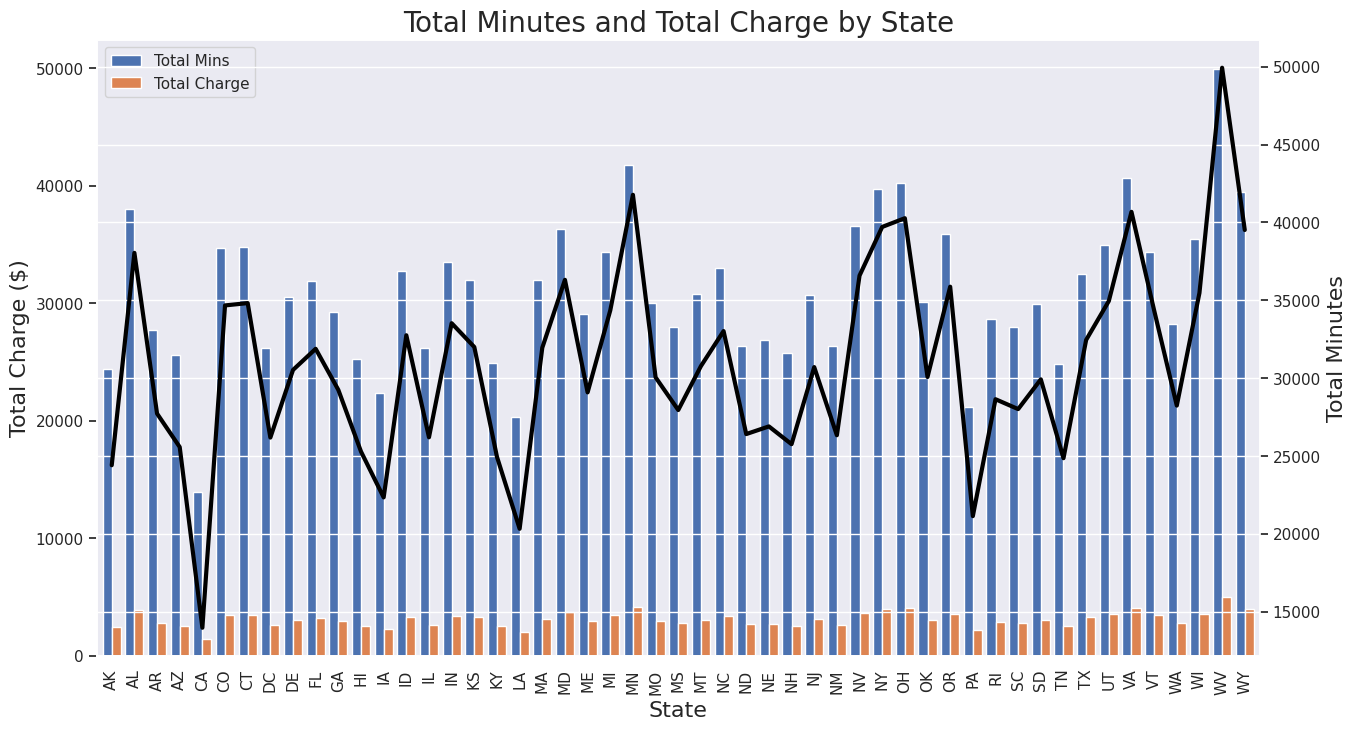

In [21]:

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(15, 8))

# Compute the total charge by adding up the day, evening, night, and international charges
df['Total Charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']

# Group the data by state and compute the total minutes
total_mins = df.groupby('State')['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'].sum()
total_mins['Total Mins'] = total_mins.sum(axis=1)

# Group the data by state and compute the total charge
total_charge = df.groupby('State')['Total Charge'].sum()

# Merge the two datasets
merged_df = pd.merge(total_mins['Total Mins'], total_charge, on='State')

# Plot a combined line and bar chart of total minutes and total charge
merged_df.plot(kind='bar', ax=ax, width=0.8)
merged_df['Total Mins'].plot(kind='line', ax=ax, color='black', secondary_y=True, linewidth=3)

# Set the title and axis labels
ax.set_title('Total Minutes and Total Charge by State', fontsize=20)
ax.set_xlabel('State', fontsize=16)
ax.set_ylabel('Total Charge ($)', fontsize=16)
ax.right_ax.set_ylabel('Total Minutes', fontsize=16)

# Rotate the x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Display the plot
plt.show()


<b> Creating map

In [25]:
import plotly.express as px

# Compute the total charge by adding up the day, evening, night, and international charges
df['Total Charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']

# Group the data by state and compute the total charge
total_charge = df.groupby('State')['Total Charge'].sum().reset_index()

# Create the choropleth map
fig = px.choropleth(total_charge, locations='State', locationmode='USA-states',
                    color='Total Charge', scope='usa',
                    hover_data=['State', 'Total Charge'],
                    color_continuous_scale=px.colors.sequential.Blues,
                    labels={'Total Charge': 'Total Charge ($)'})
fig.update_layout(title_text='Total Charges by State')
fig.show()


- Now we can observe the total charge for each state as shown in the above map